[yoctoprojectqs](https://docs.yoctoproject.org/brief-yoctoprojectqs/index.html)
```bash
sudo apt install build-essential chrpath cpio debianutils diffstat file gawk gcc git iputils-ping libacl1 liblz4-tool locales python3 python3-git python3-jinja2 python3-pexpect python3-pip python3-subunit socat texinfo unzip wget xz-utils zstd
sudo apt update
sudo apt install pylint
pip install pyinotify
```
[build-your-own-linux-image](https://medium.com/nerd-for-tech/build-your-own-linux-image-for-the-raspberry-pi-f61adb799652)
```bash
ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/sources/poky$ source oe-init-build-env 
```
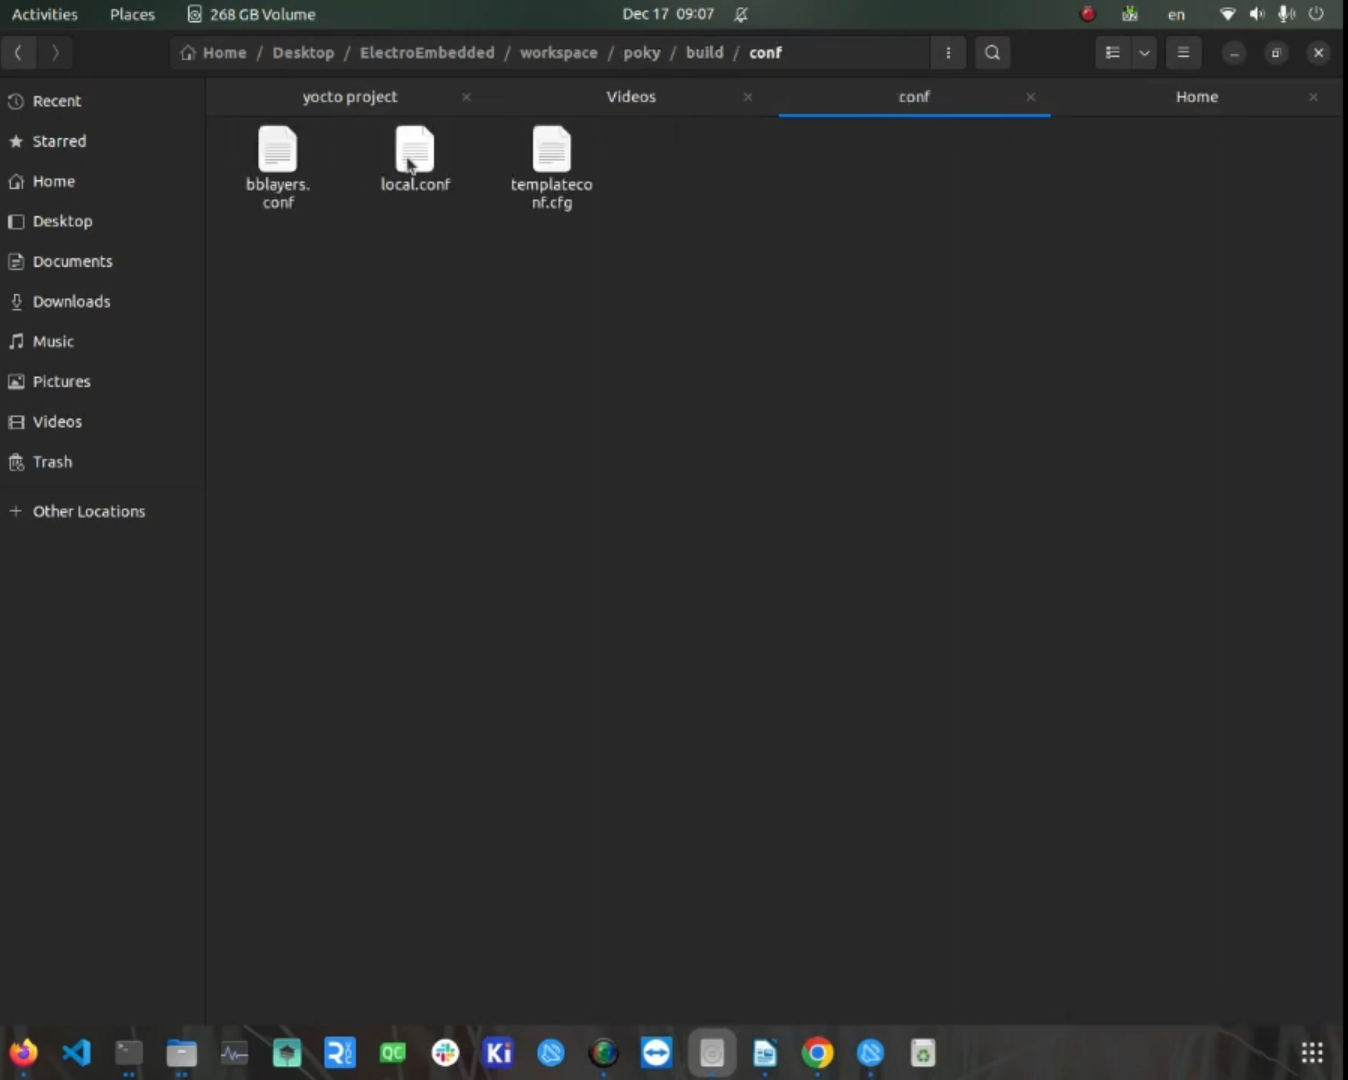
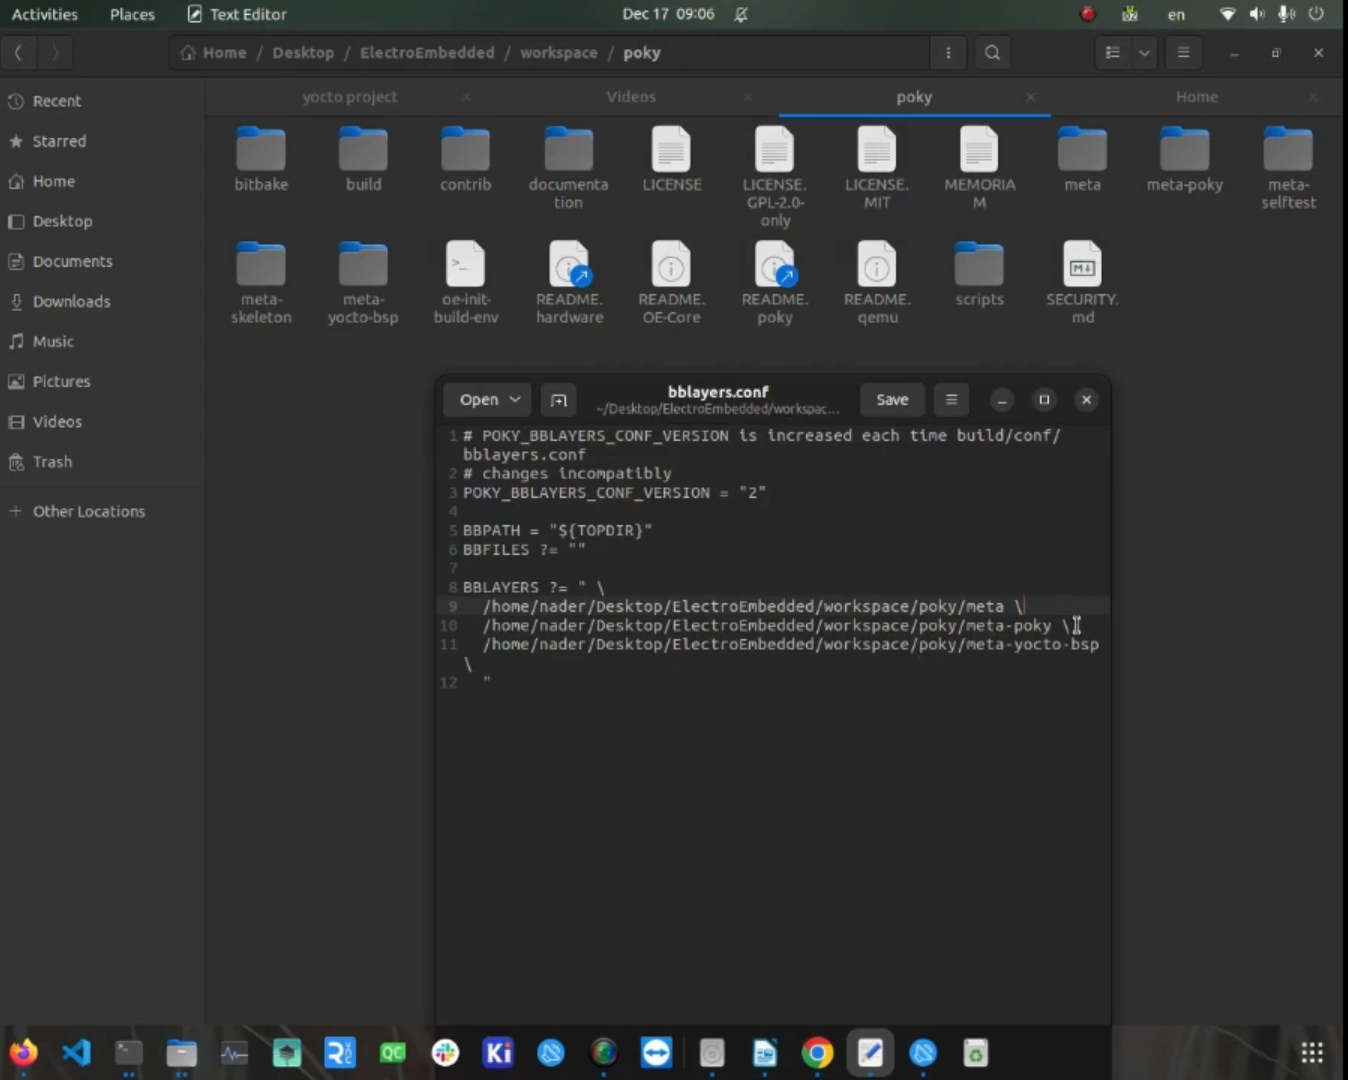
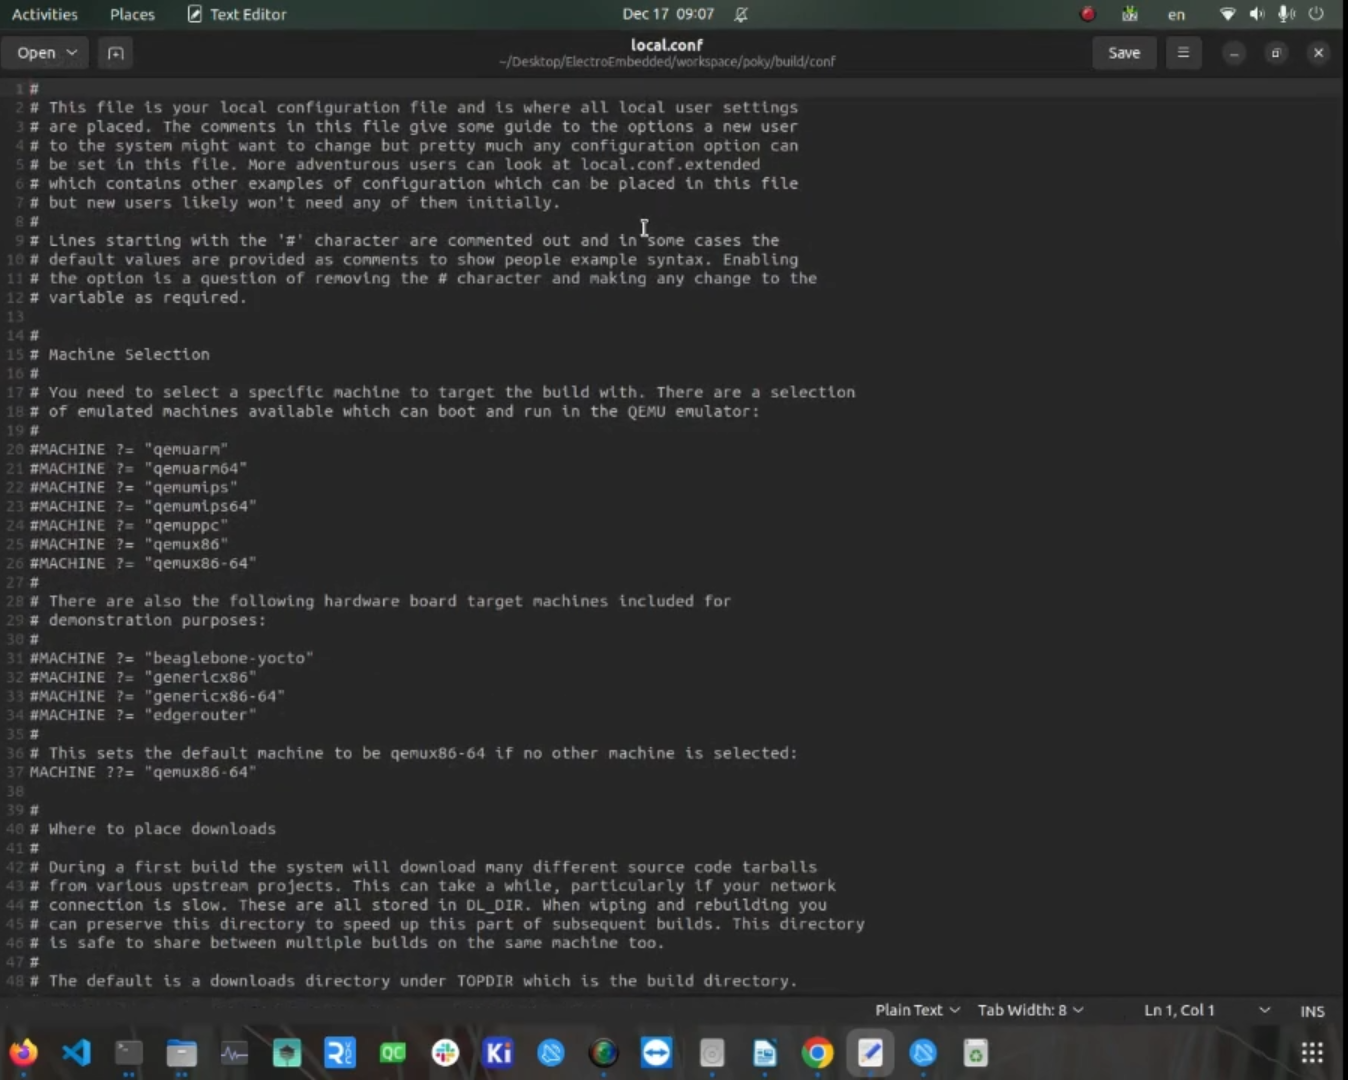

ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/sources/poky/build$ bitbake core-image-sato

runqemu qemux86-64


**Create layer**

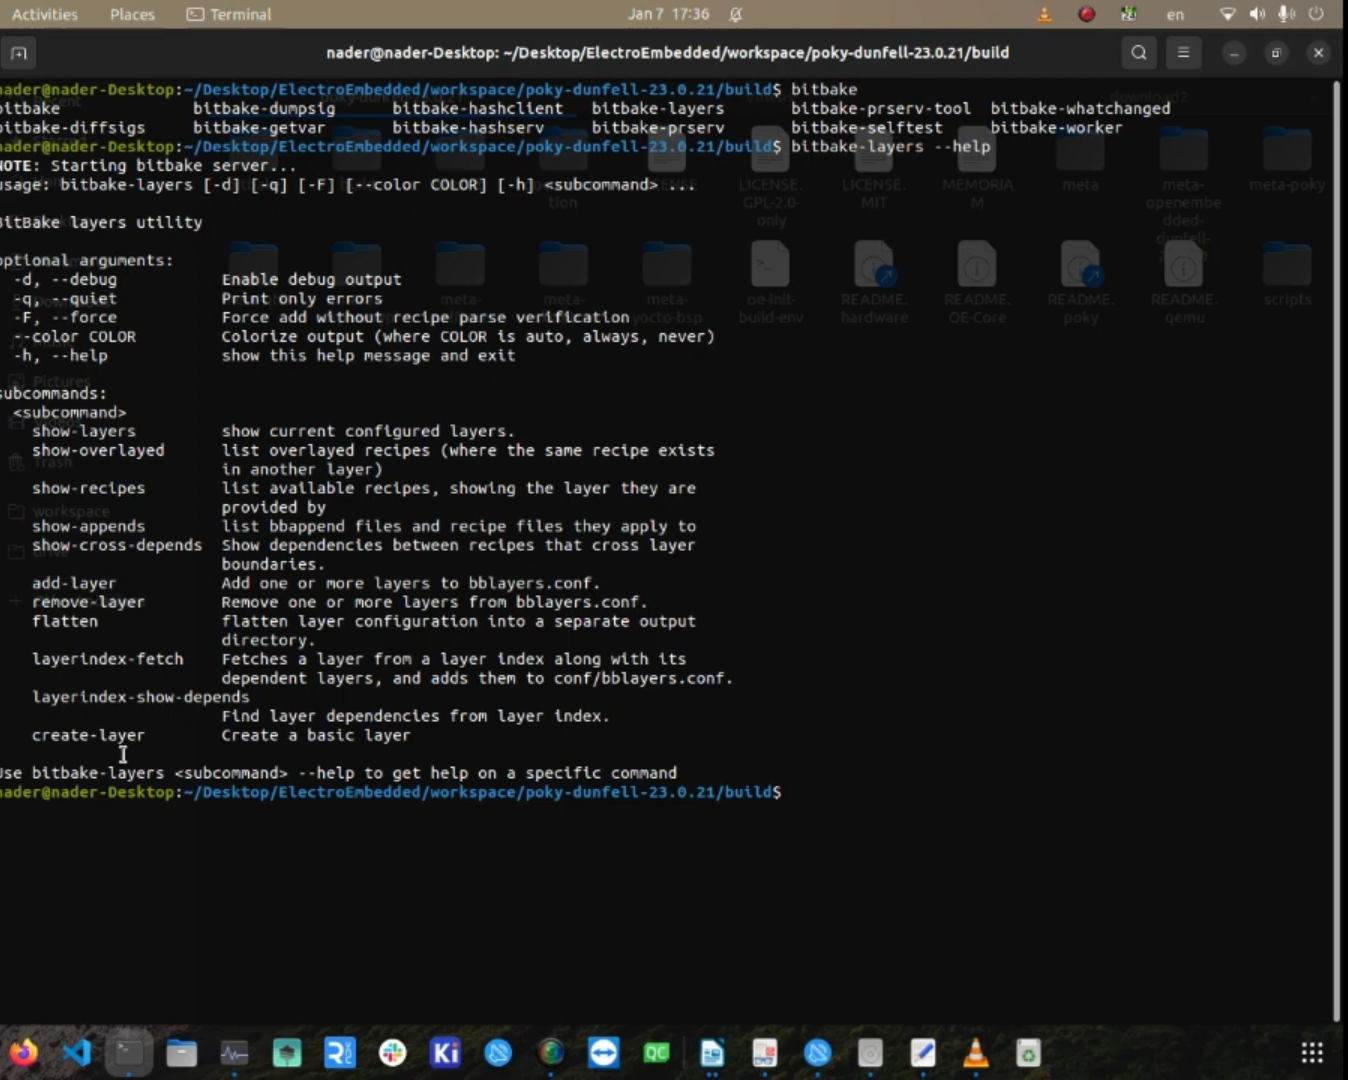
bitbake-layers --help

```bash
$ cd poky
$ git clone https://github.com/kraj/meta-altera.git
$ cd poky/build
$ bitbake-layers add-layer ../meta-altera
```


```bash

# custom aliases
alias yocto-build='source ~/Projects/Yocto/Yocto_sources/poky/oe-init-build-env /media/ferganey/00_Embedded/Building'
alias image-list='cd  /media/ferganey/00_Embedded/Building/tmp/deploy/images/raspberrypi4-64  &&   ls *wic*'
alias PQC-init='cd /home/ferganey/GitHub/personal/AutonomousVehiclesprojects/PQC_for_Secure_Automotive_Communication_on_RISC_V && s>
# Alias for development environment
alias dev="docker compose -f docker-compose-dev.yml up"

# Alias for production environment
alias prod="docker compose -f docker-compose-prod.yml up"

```

```



**steps to make custom image using** [Yocto](https://www.youtube.com/watch?v=R__wCdZ2VXY&t=768s)

[embedded_linux_ubuntu_2404_lts_with_yocto_error](https://www.reddit.com/r/embedded/comments/1cx0csa/embedded_linux_ubuntu_2404_lts_with_yocto_error/?rdt=57474)



[moby Docker](https://github.com/moby/moby)


# Introduction

Containers, particularly Docker, are becoming increasingly popular in embedded Linux systems. This tutorial explains how to integrate Docker into a Yocto Project® (YP) build setup. By following these steps, you’ll configure an environment where Docker and Docker Compose can be installed and used on embedded devices. While this is a high-level guide, you are encouraged to reference the Yocto Project Mega-Manual for a deeper understanding.

## Prerequisites

To complete this tutorial, ensure you have:

1. **A prepared build setup**: We use a Yocto Project build setup targeting a Raspberry Pi 4.
2. **An initialized shell**: Run `source poky/oe-init-build-env` in the Yocto directory to initialize the build environment.

---

# Adding Docker Support with meta-virtualization

### Step 1: Get the meta-virtualization layer

Navigate to the sources directory and clone the meta-virtualization repository:

```bash
cd sources
git clone git://git.yoctoproject.org/meta-virtualization -b kirkstone
cd ..
```

### Step 2: Add the layer dependencies

Switch to the build directory and add the necessary layers:

```bash
cd build
bitbake-layers add-layer ../sources/meta-openembedded/meta-filesystems
bitbake-layers add-layer ../sources/meta-virtualization
bitbake-layers show-layers
```

---

# Building Docker

### Step 3: Test the Docker build

You can build Docker using either of the following commands:

```bash
bitbake virtual/docker
# or specify a specific provider
bitbake docker-ce
```

This only builds Docker; it doesn’t include it in the final image.

### Step 4: Enable virtualization features

Add `virtualization` to `DISTRO_FEATURES` in `local.conf` to ensure all features are active:

```bash
echo 'DISTRO_FEATURES:append = " virtualization"' >> conf/local.conf
```

### Step 5: Add Docker to the image

To include Docker in the final image, append `docker-ce` to the `IMAGE_INSTALL` variable:

```bash
echo 'IMAGE_INSTALL:append = " docker-ce"' >> conf/local.conf
```

Build and test the image:

```bash
bitbake core-image-base
# Deploy and boot the image
# Then, test Docker functionality
docker run -it --rm hello-world
```

---

# Adding Docker-Compose

### Step 6: Update to the mickledore release

Since Docker Compose is available from the mickledore release, update all layers to this branch. Rebuild your image after switching branches.

### Step 7: Add Docker Compose

Append `docker-compose` to `IMAGE_INSTALL`:

```bash
echo 'IMAGE_INSTALL:append = " docker-compose"' >> conf/local.conf
```

---

# Adding iptables NAT Support

### Step 8: Create a custom layer for kernel modifications

1. Create the directory structure for kernel recipes:
   ```bash
   mkdir -p recipes-kernel/linux-raspberrypi
   cd recipes-kernel/linux-raspberrypi
   ```

2. Add a `.bbappend` file:
   ```bash
   cat >> linux-raspberrypi_6.1.bbappend <<EOF
   FILESEXTRAPATHS:prepend := "${THISDIR}/${PN}:"
   SRC_URI += "file://netfilter.cfg"
   EOF
   ```

3. Create the kernel fragment `netfilter.cfg`:
   ```bash
   mkdir linux-raspberrypi && cd linux-raspberrypi
   cat >> netfilter.cfg <<EOF
   CONFIG_NETFILTER_NETLINK=y
   CONFIG_NF_NAT=y
   CONFIG_NF_TABLES=y
   CONFIG_NFT_NAT=y
   CONFIG_NETFILTER_XTABLES=y
   CONFIG_NETFILTER_XT_NAT=y
   CONFIG_NETFILTER_XT_TARGET_NETMAP=y
   CONFIG_NETFILTER_XT_TARGET_REDIRECT=y
   CONFIG_NETFILTER_XT_TARGET_MASQUERADE=y
   CONFIG_IP_NF_IPTABLES=y
   CONFIG_IP_NF_NAT=y
   CONFIG_IP_NF_TARGET_MASQUERADE=y
   CONFIG_IP_NF_TARGET_NETMAP=y
   CONFIG_IP_NF_TARGET_REDIRECT=y
   EOF
   ```

Rebuild the image to apply the kernel changes.

---

# Conclusion

This tutorial demonstrated how to integrate Docker and Docker Compose into a Yocto Project-based Linux image. While Raspberry Pi 4 was used as an example, the steps are adaptable to other Yocto-supported boards. Proper maintenance requires placing the configuration changes into custom distribution files and image recipes.



[openembedded:layerindex](https://layers.openembedded.org/layerindex/branch/master/layers/)



```bash
ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/build$ bitbake-layers show-recipes | grep docker
docker-ce:
docker-distribution:
docker-moby:
  meta-virtualization  git (skipped: PREFERRED_PROVIDER_virtual/docker set to docker-ce, not docker-moby)
python3-docker:
python3-docker-compose:
python3-docker-pycreds:
python3-dockerpty:
runc-docker:
  meta-virtualization  git (skipped: PREFERRED_PROVIDER_virtual/runc set to runc-opencontainers, not runc-docker)



# modify local.conf


# Add Docker and Docker Compose to the image
# IMAGE_INSTALL += "docker"
IMAGE_INSTALL += "docker-ce docker-compose"
PREFERRED_PROVIDER_virtual/docker = "docker-moby"
PREFERRED_PROVIDER_virtual/runc = "runc-docker"


# Add virtualization to the DISTRO_FEATURES
DISTRO_FEATURES += "virtualization"
DISTRO_FEATURES += "seccomp"
# Enable Docker as part of the virtualization feature
VIRTUALIZATION_DISTRO_FEATURES = "docker"
# Local mirror for Git repositories
INHERIT += "own-mirrors"
SOURCE_MIRROR_URL ?= "file:///home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/build/downloads"
# Mirror URL rewriting for Git repositories
GIT_MIRRORS += "git://github.com/containerd/containerd file:///home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/build/downloads/git2/github.com.containerd.containerd"
GIT_MIRRORS += "https://github.com/containerd/containerd file:///home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/build/downloads/git2/github.com.containerd.containerd"
GIT_MIRRORS += "git://github.com/moby/moby file:///home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/build/downloads/git2/github.com.moby.moby"
GIT_MIRRORS += "https://github.com/moby/moby file:///home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/build/downloads/git2/github.com.moby.moby"




ferganey@ferganey-linux:~$ nano /home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/meta-virtualization/recipes-containers/docker/docker-ce_git.bb


{
SRC_URI = "\
    git://github.com/moby/moby.git;branch=20.10;name=docker;protocol=https \
    git://github.com/docker/libnetwork.git;branch=master;name=libnetwork;destsuffix=git/libnetwork;protocol=https \
    git://github.com/docker/cli.git;branch=20.10;name=cli;destsuffix=git/cli;protocol=https \
    file://docker.init \
    file://0001-libnetwork-use-GO-instead-of-go.patch \
    file://0001-cli-use-external-GO111MODULE-and-cross-compiler.patch \
    file://0001-dynbinary-use-go-cross-compiler.patch \
    file://0001-Revert-go-updates-from-1.19.12-to-1.18.7.patch;patchdir=src/import \
    file://0002-Revert-go-updates-from-1.18.7-to-1.17.13.patch;patchdir=src/import \
    file://0003-builder.go-avoid-using-strings.Cut-from-go-1.18.patch;patchdir=src/import \
"


}


ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/build/downloads/git2/github.com.moby.moby.git/moby/hack/make$ patch -p1 < /home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/build/tmp/work/cortexa72-poky-linux/docker-ce/20.10.25-ce+git791d8ab87747169b4cbfcdf2fd57c81952bae6d5-r0/git/patches/0001-dynbinary-use-go-cross-compiler.patch

ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/build$ cd /home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/build/downloads/git2/github.com.moby.moby.git/moby/hack/dockerfile/install

patch -p1 < /home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/meta-virtualization/recipes-containers/docker/files/0001-dynbinary-use-go-cross-compiler.patch


{
  .binary
}


ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/build$ bitbake docker-ce -c do_patch -f -k


ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/build$ sudo apt install quilt






ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/build$ cd /home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/meta-raspberrypi/recipes-kernel/linux
ferganey@ferganey-linux:/home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/meta-raspberrypi/recipes-kernel/linux$ cat >> linux-raspberrypi_6.1.bbappend <<EOF
FILESEXTRAPATHS:prepend := "${THISDIR}/${PN}:"
SRC_URI += "file://netfilter.cfg"
EOF
ferganey@ferganey-linux:/home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/meta-raspberrypi/recipes-kernel/linux$ 
cat >> netfilter.cfg <<EOF
CONFIG_NETFILTER_NETLINK=y
CONFIG_NF_NAT=y
CONFIG_NF_TABLES=y
CONFIG_NFT_NAT=y
CONFIG_NETFILTER_XTABLES=y
CONFIG_NETFILTER_XT_NAT=y
CONFIG_NETFILTER_XT_TARGET_NETMAP=y
CONFIG_NETFILTER_XT_TARGET_REDIRECT=y
CONFIG_NETFILTER_XT_TARGET_MASQUERADE=y
CONFIG_IP_NF_IPTABLES=y
CONFIG_IP_NF_NAT=y
CONFIG_IP_NF_TARGET_MASQUERADE=y
CONFIG_IP_NF_TARGET_NETMAP=y
CONFIG_IP_NF_TARGET_REDIRECT=y
EOF

```



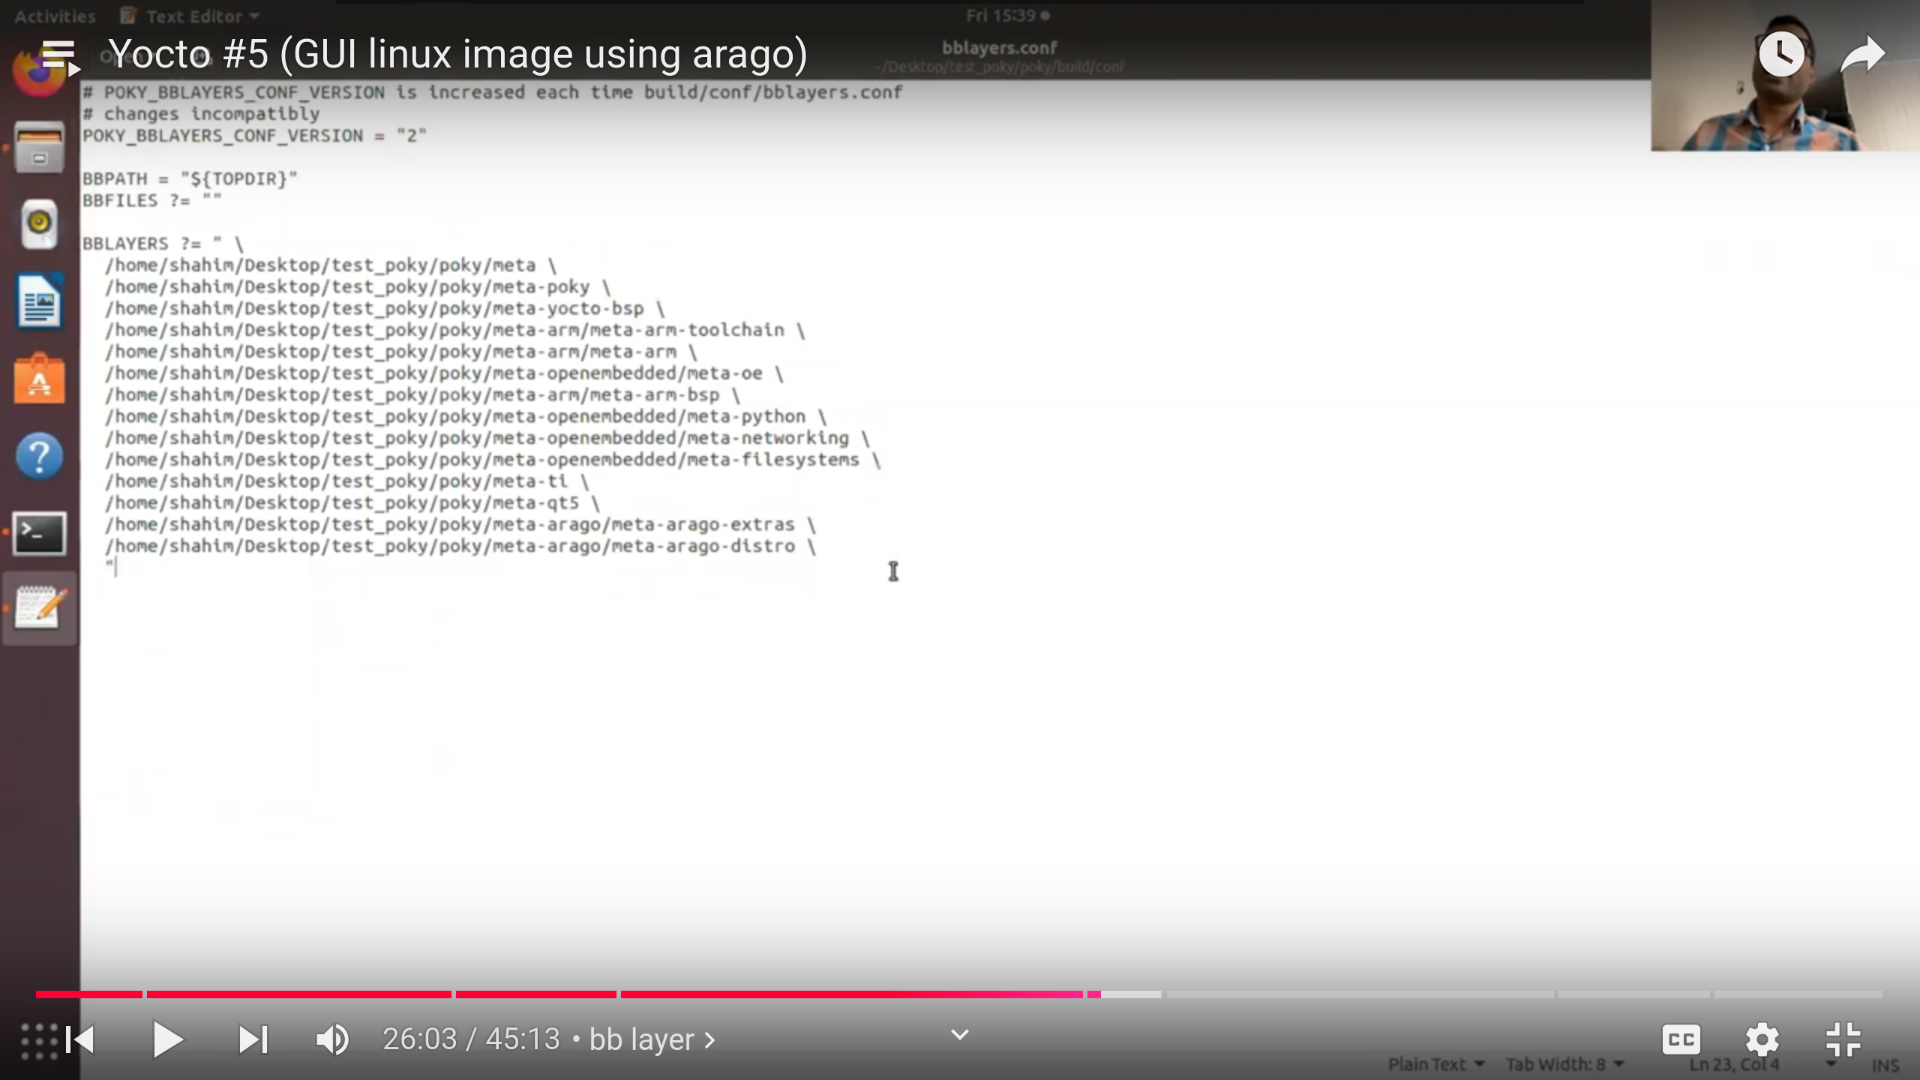

# **Cleaning Version from Scratch**


### **Step-1**

```bash
ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources$ git clone -b kirkstone  git://git.yoctoproject.org/poky.git

ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources$ sudo apt install build-essential chrpath cpio debianutils diffstat file gawk gcc git iputils-ping libacl1 liblz4-tool locales python3 python3-git python3-jinja2 python3-pexpect python3-pip python3-subunit socat texinfo unzip wget xz-utils zstd



ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky$ 
git config --global http.postBuffer 3145728000
git config --global http.lowSpeedLimit 0
git config --global http.lowSpeedTime 999999

# from -- > https://layers.openembedded.org/layerindex/branch/master/machines/?q=raspberrypi&search=1  Download raspi4 for 64 bit
ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky$ 
git clone -b kirkstone git://git.yoctoproject.org/meta-raspberrypi
git clone -b kirkstone git://git.openembedded.org/meta-openembedded
git clone -b kirkstone git://git.yoctoproject.org/meta-virtualization


# https://docs.yoctoproject.org/ref-manual/images.html
ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky$ source oe-init-build-env

ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky$ nano build/conf/bblayers.conf
{
BBLAYERS ?= " \
  /home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/meta \
  /home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/meta-poky \
  /home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/meta-virtualization \
  /home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/meta-openembedded/meta-oe \  
  /home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/meta-openembedded/meta-filesystems \
  /home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/meta-openembedded/meta-python \
  /home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/meta-openembedded/meta-networking \
  /home/ferganey/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/meta-raspberrypi \
  "
}

ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky$ nano build/conf/local.conf
{
MACHINE ?= "raspberrypi4-64"
ENABLE_UART = "1"
BB_NUMBER_THREADS = "8"
PARALLEL_MAKE = "-j 16"
ACCEPT_FSL_EULA = "1"
FETCH_CMD = "git -c http.postBuffer=2147483648"
GIT_CONFIG_OPTIONS = "-c core.fsync=true"
DISTRO_FEATURES += " virtualization systemd seccomp"
VIRTUALIZATION_FEATURES = "docker"
}

ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky$  
git clone -b kirkstone https://github.com/meta-qt5/meta-qt5.git
git clone -b kirkstone git://git.openembedded.org/openembedded-core
ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/build$ 
bitbake-layers add-layer ../meta-qt5/
bitbake-layers add-layer ../meta-docker/
bitbake-layers add-layer ../meta-userapp/
bitbake-layers add-layer ../multimedia/

ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/meta-raspberrypi$ 
ls conf/machine/
sudo apt update
sudo apt install build-essential chrpath diffstat gawk texinfo

ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/build$ bitbake core-image-base

ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/build/tmp/deploy/images/raspberrypi4-64$  ls *wic*
  core-image-base-raspberrypi4-64-20250116150646.rootfs.wic.bmap  core-image-base-raspberrypi4-64.wic.bmap
  core-image-base-raspberrypi4-64-20250116150646.rootfs.wic.bz2   core-image-base-raspberrypi4-64.wic.bz2

ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/build/tmp/deploy/images/raspberrypi4-64$ sudo bmaptool copy core-image-base-raspberrypi4-64-20250118064120.rootfs.wic.bz2 /dev/mmcblk0
sudo bmaptool copy core-image-base-raspberrypi4-64-20250202092030.rootfs.wic.bz2 /dev/mmcblk0
sudo bmaptool copy  core-image-base-raspberrypi4-64-20250118194136.rootfs.tar.bz2 /dev/mmcblk0

```



**Debugging**

| **Variable**             | **Purpose**                                                         | **Usage**                                                                 | **Example**                                                                 | **Effect**                                                                 |
|--------------------------|---------------------------------------------------------------------|---------------------------------------------------------------------------|-----------------------------------------------------------------------------|---------------------------------------------------------------------------|
| **`IMAGE_INSTALL`**       | Specifies packages to be installed in the image.                    | Lists the software packages to be included in the image.                 | `IMAGE_INSTALL += "package1 package2"`                                       | Ensures `package1` and `package2` are installed in the image.             |
| **`IMAGE_FEATURES`**      | Specifies high-level features or capabilities for the image.        | Defines features like SSH, systemd, or extra services for the image.    | `IMAGE_FEATURES += "ssh server"`                                             | Enables SSH and server features in the image.                             |
| **`KERNEL_FEATURES`**     | Specifies features related to the Linux kernel.                     | Configures kernel options such as enabling specific drivers or settings. | `KERNEL_FEATURES += "debug"`                                                | Enables kernel debugging features in the kernel configuration.           |
| **`DISTRO_FEATURES`**     | Specifies the features of the target distribution (e.g., systemd).  | Configures the capabilities of the overall distribution.                 | `DISTRO_FEATURES += "systemd virtualization"`                               | Enables support for `systemd` and `virtualization` in the distribution.    |
| **`VIRTUALIZATION_FEATURES`** | Specifies virtualization-related features for the distribution. | Configures virtualization-specific capabilities and backends.            | `VIRTUALIZATION_FEATURES += "qemu kvm"`                                      | Enables support for `qemu` and `kvm` virtualization backends.             |


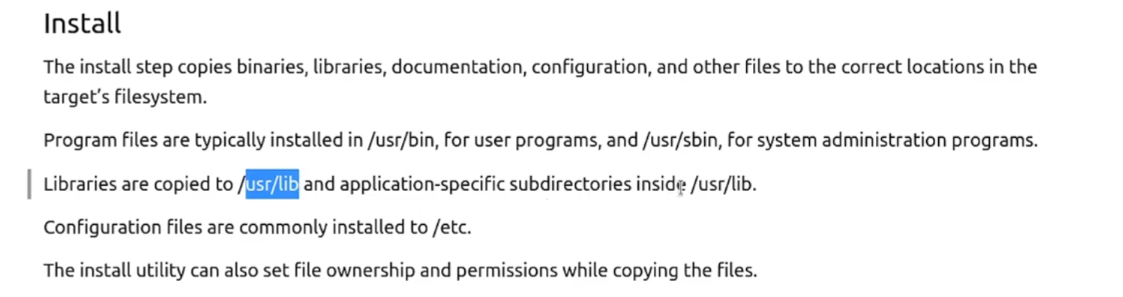

---
---
| Feature                    | `bitbake.conf`                                    | `local.conf`                                        |
|----------------------------|--------------------------------------------------|----------------------------------------------------|
| **Purpose**                | Global configuration for the entire build system  | Project or build-specific configuration            |
| **Location**               | `meta/conf/bitbake.conf`                          | `build/conf/local.conf`                            |
| **Scope of Impact**        | Affects all builds in the Yocto system            | Affects only the specific build directory          |
| **Modification Frequency** | Rarely modified by end users                      | Frequently modified for per-project customization  |
| **Use Cases**              | Core build system settings (e.g., DISTRO_FEATURES)| Customizing machine type, image contents, threads  |

---
---

| Feature           | `DEPENDS`                                  | `RDEPENDS_${PN}`                                  |
|-------------------|---------------------------------------------|--------------------------------------------------|
| **Purpose**       | Build-time dependencies                     | Runtime dependencies                              |
| **Scope**         | Affects what needs to be built first         | Affects what is installed on the target system    |
| **Impact**        | Controls compilation and linking             | Controls runtime environment setup                |
| **Examples**      | `glib-2.0`, `python3-native`                | `bash`, `coreutils`, `libstdc++`                  |
| **Usage Context** | Dependencies for building a recipe           | Dependencies for running the resulting package    |

---
---
| Feature              | Systemd                        | SysVinit                          | OpenRC                  | runit             |
|----------------------|--------------------------------|------------------------------------|------------------------|------------------|
| **Startup Parallelism** | Yes                            | No                                 | Yes                    | Yes              |
| **Service Monitoring** | Built-in                        | Limited                            | Built-in               | Built-in         |
| **Dependency Handling** | Automatic                       | Manual                             | Automatic              | Partial          |
| **Configuration**      | Unit files (.service, etc.)     | Shell scripts in `/etc/init.d/`    | Shell-like syntax      | Shell scripts    |
| **Logging**            | Integrated (`journalctl`)        | External (`syslog`)                | External (`syslog`)    | External         |


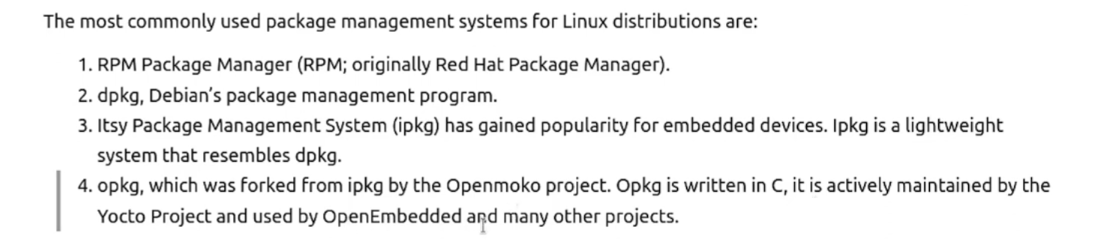


| Feature         | **NFS**                                   | **SSH**                                    |
|-----------------|-------------------------------------------|--------------------------------------------|
| **Main Purpose** | Network-based file sharing                | Secure remote shell access and file transfer |
| **Protocol Type**| File system protocol                      | Remote access and command execution protocol |
| **Use Case**     | Sharing and mounting remote directories   | Logging into a system, transferring files |
| **Security**     | Not inherently secure (requires Kerberos for security) | Secure by default (uses encryption) |
| **Persistence**  | Persistent access to files/directories    | Stateless, one-time command/session |
| **Performance**  | Optimized for file sharing                | Best for command execution and file transfer |

---
---

[DISTRO_FEATURES VS MACHINE_FEATURES](https://www.youtube.com/watch?v=2hlE0g2qbuQ&list=PLBn6-C63fDkFBuKHXNnB8TzAoJpdl0AmA&index=17)

| Aspect                | **DISTRO_FEATURES**                                         | **MACHINE_FEATURES**                                             |
|-----------------------|-------------------------------------------------------------|------------------------------------------------------------------|
| **Purpose**            | Defines features for the **entire distribution** (distro).  | Defines features for **specific hardware** (machine or platform). |
| **Scope**              | Affects all machines in the distribution.                   | Affects the specific target machine for which the image is built. |
| **Examples**           | `systemd`, `ssh-server`, `x11`, `dev-pkgs`                  | `gpu`, `wifi`, `camera`, `serial`, `multitouch`                   |
| **Usage**              | To configure global features that affect the overall image. | To configure machine-specific hardware or capabilities.         |



[QEMU IMAGE](https://www.youtube.com/watch?v=Dj4muDMwuCs&list=PLBn6-C63fDkFBuKHXNnB8TzAoJpdl0AmA&index=18)




```bash
bitbake -h
bitbake --help

# used for listing all packages avaiable for IMAGE_INSTALL 
bitbake -s

# used for listing all features avaiable for DISTRO_FEATURES 
bitbake -e imagename | grep "^DISTRO_FEATURES"
bitbake IMAGE_NAME -e | grep DISTRO_FEATURES=
bitbake -e core-image-base | grep "^DISTRO_FEATURES"


# if you need skip errors and continue build
bitbake -k core-image-base

# for clean sstate
bitbake -c cleansstate core-image-base

# detect which version of python used 
bitbake -e | grep '^PYTHON'

# be care if you used oe-init  for shell where the current version of python 3.12 and installed another version of python to use it on another shell so the shell related to bitbake will use the old version of python so please check the shell of bitbake using :
python3 --version

# if you need build only custome task
bitbake binutils -c clean
bitbake binutils -c compile


# to know which init system used via your image
ps -p 1
    # if systemd wwork cooreectly it must run 
systemctl
ls -l /sbin/init

# to list all images avaiable
    ## https://www.youtube.com/watch?v=iXvaDHVupBc&list=PLBn6-C63fDkFBuKHXNnB8TzAoJpdl0AmA&index=15
find ./meta*/recipes*/images -name  "*.bb" -print
find ./meta*/ -name  "core-image.bbclass" -print

# for printing all avaiable receipes ffrom all layers that can add to MACHINEFEATURES
bitbake-layers show-recipes


```

### **Step-2 | Building and Running Containers with Yocto**


### **A: Configure Yocto to Include Docker**

 - Enable Docker in Yocto: Add to your local.conf: ```IMAGE_INSTALL += "docker-ce"```

 - Set Machine Features: Include necessary machine features in conf/machine/raspberrypi4.conf: ```MACHINE_FEATURES += "wifi usbhost bluetooth"```

 - Include the Docker Group for Permissions: Add a user to the docker group: ```EXTRA_USERS_PARAMS = "usermod -a -G docker root"```

### **B: Define a Custom Docker Image Recipe**

 - Create a New Recipe in Your Custom Layer: Navigate to your custom layer and create a recipes-containers/docker-image directory:

```bash
# https://www.youtube.com/watch?v=8BIGDRJzZCY&list=PLBn6-C63fDkFBuKHXNnB8TzAoJpdl0AmA&index=16
ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/build$ 
bitbake-layers create-layer ../meta-user-app
bitbake-layers add-layer ../meta-user-app
mkdir -p ../meta-user-app/recipes-containers/docker-image
cd ../meta-user-app/recipes-containers/docker-image


ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/meta-user-app/recipes-containers/docker-image$
touch docker-image.bb  Dockerfile  hello.py


```

### **C: Add the Custom Docker Image to Your Yocto Build**

 - Include Your Custom Docker Image in the Build: Add the following to conf/local.conf: ```IMAGE_INSTALL += "docker-image"```

 - Enable Docker in Yocto: ```IMAGE_INSTALL += "docker-ce"```


### **D: Build Yocto Image**
```bash
bitbake core-image-base
```

### **E: Deploy and Run Containers on Target**

 - Load the Yocto Image on Raspberry Pi:

 - Run Docker on Raspberry Pi: ```docker run my-docker-image:1.0```
```bash
docker build -t my-docker-image:1.0 .
docker run --cap-drop=ALL --security-opt no-new-privileges --read-only --user myuser --cpus="1.0" --cpu-shares=512 --cpu-period=100000 --cpu-quota=50000 --memory="512m" --memory-swap="1g" my-docker-image:1.0

```

> WHEN YOU USE DOCKER CONTAINER ENUSURE THAT YOU USE DIGITS NOT TAGS

> CHECK THIS CONFIGURATION ENABLED ON THE KERNEL "https://github.com/moby/moby/blob/master/contrib/check-config.sh"
> SO RUN ./check-config.sh

> https://www.youtube.com/watch?v=b3ViCfkU3J4&t=999s

### **RASPI Configuration local.conf**

[local.conf-1](https://github.com/FengD/yocto_build_raspberrypi4_image) |
[local.conf-2](https://github.com/Mahmoud-M-Mustafa/Build-Raspberrypi4-Image-with-Yocto-project/blob/main/local.conf) |
[local.conf-3](https://github.com/iot-lab/iot-lab-yocto/blob/master/build-rpi4/conf/local.conf) |
[local.conf-4](https://github.com/PelionIoT/mbed-cloud-client-yocto-setup/blob/master/configurations/raspberrypi-conf/local.conf.sample) |
[local.conf-5](https://github.com/cosmo0920/rpi3-yocto-conf/blob/master/conf/local.conf)


### **Step-3 |  Enable WIFI**



[Enable WIFI](https://hub.mender.io/t/how-to-configure-networking-using-systemd-in-yocto-project/1097) | 
[SERVICED_WIFI](https://community.nxp.com/t5/i-MX-Processors/Configure-wireless-in-Yocto-Linux-automatically-when-the-system/m-p/1576795#M199450) | [Wifi Isuue](https://github.com/agherzan/meta-raspberrypi/issues/1388) | [bring up hardware](https://www.youtube.com/watch?v=p6cM1OjuWWY&list=PLkH1REggdbJqPWbodDhF2MRWALXjQZwNG&index=6)

```bash

ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/build$ mkdir -p ../meta-userapp/recipes-core/systemd
cat > ../meta-userapp/recipes-core/systemd/systemd_%.bbappend <<EOF
PACKAGECONFIG:append = " networkd resolved"
EOF


#  eth.network
ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/build$ cat >../meta-userapp/recipes-core/systemd-conf/files/eth.network <<EOF
[Match]
Name=eth*
KernelCommandLine=!nfsroot

[Network]
DHCP=v4

[DHCPv4]
UseHostname=false
EOF



#  en.network
ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/build$ cat >../meta-userapp/recipes-core/systemd-conf/files/en.network <<EOF
[Match]
Name=en*
KernelCommandLine=!nfsroot

[Network]
DHCP=v4

[DHCPv4]
UseHostname=false
EOF



#  wlan.network
ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/build$ cat >../meta-userapp/recipes-core/systemd-conf/files/wlan.network <<EOF
[Match]
Name=wlan*
KernelCommandLine=!nfsroot

[Network]
DHCP=v4

[DHCPv4]
UseHostname=false
EOF




ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/build$ mkdir -p ../meta-userapp/recipes-connectivity/wpa-supplicant/files
cat >../meta-userapp/recipes-connectivity/wpa-supplicant/wpa-supplicant_%.bbappend <<EOF
FILESEXTRAPATHS:prepend := "${THISDIR}/files:"

SRC_URI += "file://wpa_supplicant-nl80211-wlan0.conf"

SYSTEMD_AUTO_ENABLE = "enable"
SYSTEMD_SERVICE:${PN}:append = " wpa_supplicant-nl80211@wlan0.service  "

do_install:append () {
   install -d ${D}${sysconfdir}/wpa_supplicant/
   install -D -m 600 ${WORKDIR}/wpa_supplicant-nl80211-wlan0.conf ${D}${sysconfdir}/wpa_supplicant/

   install -d ${D}${sysconfdir}/systemd/system/multi-user.target.wants/
   ln -s ${systemd_unitdir}/system/wpa_supplicant@.service ${D}${sysconfdir}/systemd/system/multi-user.target.wants/wpa_supplicant-nl80211@wlan0.service
}   
EOF







ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/build$ mkdir -p ../meta-userapp/recipes-core/systemd-conf/files
cat > ../meta-userapp/recipes-core/systemd-conf/systemd-conf_%.bbappend <<EOF
FILESEXTRAPATHS:prepend := "${THISDIR}/files:"

SRC_URI += " \
    file://eth.network \
    file://en.network \
    file://wlan.network \
"

FILES:${PN} += " \
    ${sysconfdir}/systemd/network/eth.network \
    ${sysconfdir}/systemd/network/en.network \
    ${sysconfdir}/systemd/network/wlan.network \
"

do_install:append() {
    install -d ${D}${sysconfdir}/systemd/network
    install -m 0644 ${WORKDIR}/eth.network ${D}${sysconfdir}/systemd/network
    install -m 0644 ${WORKDIR}/en.network ${D}${sysconfdir}/systemd/network
    install -m 0644 ${WORKDIR}/wlan.network ${D}${sysconfdir}/systemd/network
}
EOF




ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/build$ wpa_passphrase 'ferjani' 'your_wifi_password' > ../meta-userapp/recipes-connectivity/wpa-supplicant/files/wpa_supplicant-nl80211-wlan0.conf






```


> From menu config select device driver --> network device support --> wirless lan support --->  
>                   [*]     Support for N-PHY (the main 802.11n series) devices    



**Debugging commands**

```bash
sudo pkill wpa_supplicant
sudo wpa_supplicant -B -i wlan0 -c /etc/wpa_supplicant/wpa_supplicant-nl80211-wlan0.conf
sudo groupadd netdev
sudo useradd ferganey
    passwd {/etc/}    /etc for configurations
    group {/etc} 
sudo rm -rf /var/run/wpa_supplicant/*
sudo wpa_supplicant -B -i wlan0 -c /etc/wpa_supplicant/wpa_supplicant-nl80211-wlan0.conf
sudo dhclient wlan0
ifconfig wlan0
ip route show
getent group
id root
cat /etc/group
cat /etc/passwd
grep netdev /etc/group
cat /etc/shadow

# do not use /etc/shadow to change directly instead use 
chage ferganey -l
chage ferganey
passwd ferganey
usermod -c
usermod -g
usermod -G

```

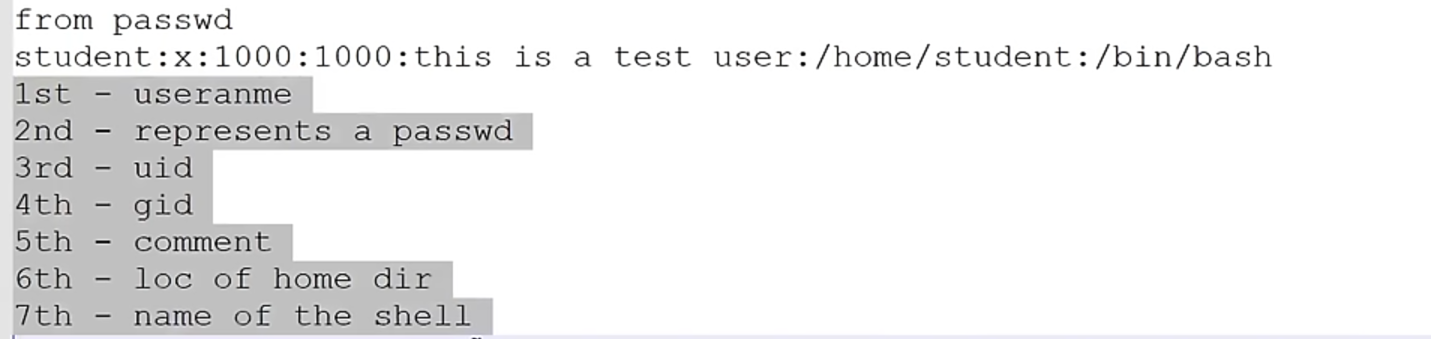
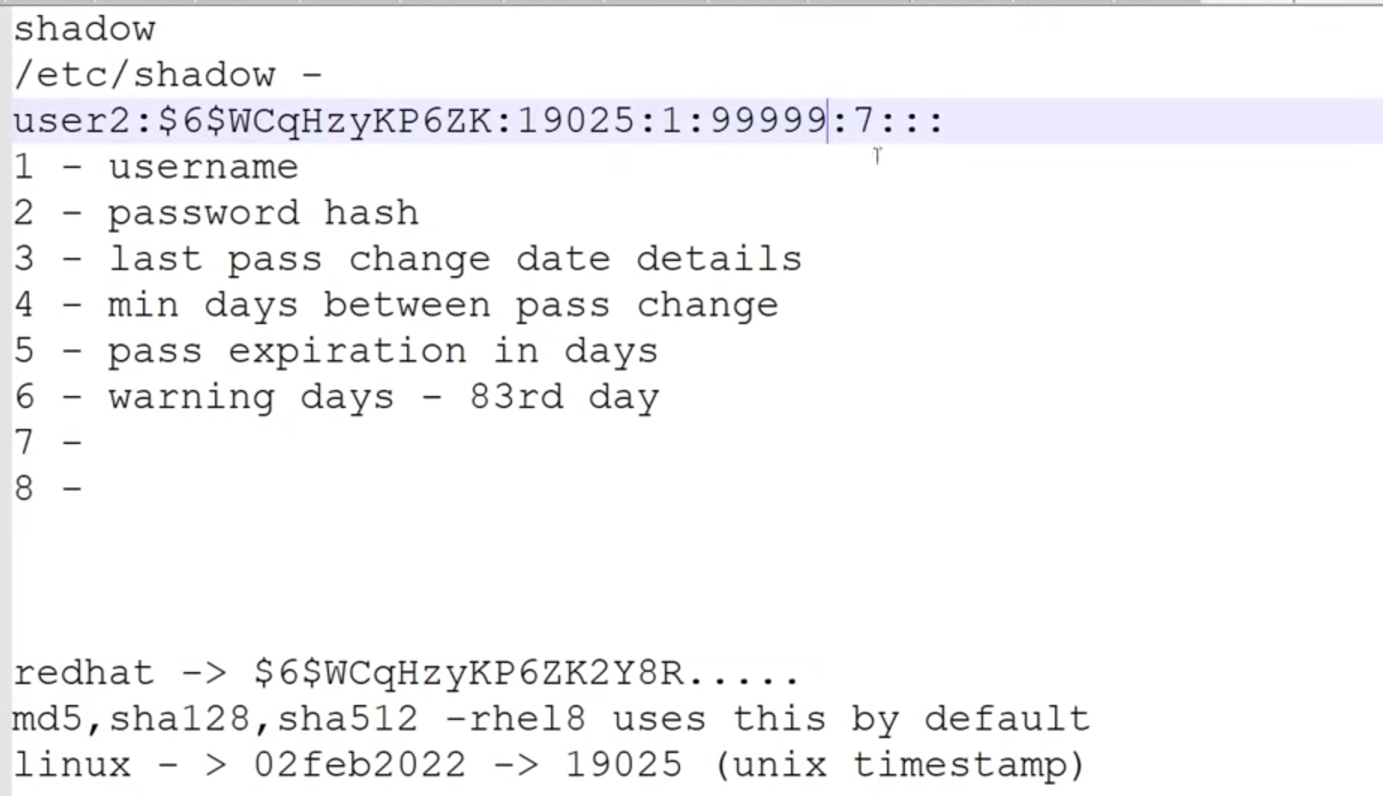
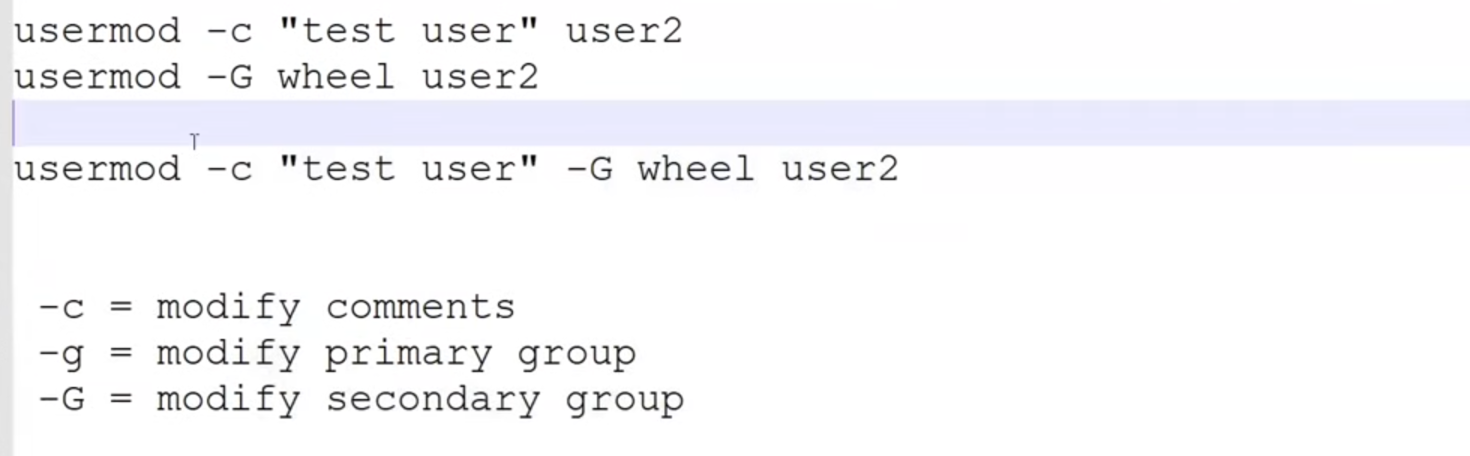
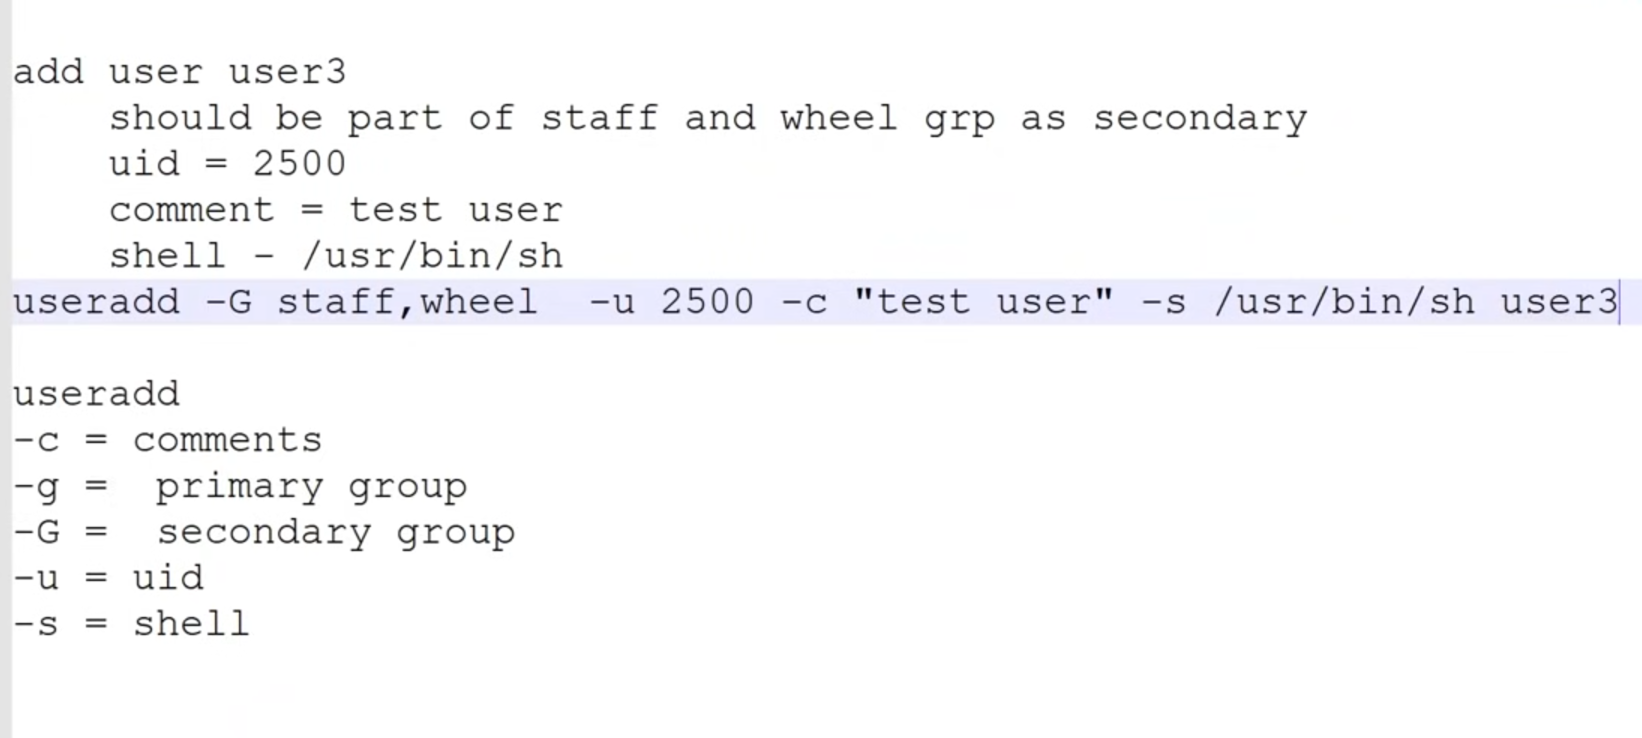

> Now the current meta-userapp is 

```plaintext

ferganey@ferganey-linux:~/Embedded_Systems/AutonomousVehiclesprojects/AI_Voice_Assistant_using_Raspi4/Yocto/Yocto_sources/poky/meta-userapp$ tree
.
├── classes
│   └── useradd.bbclass
├── conf
│   └── layer.conf
├── COPYING.MIT
├── README
├── recipes-connectivity
│   ├── dhcpcd
│   │   ├── files
│   │   │   ├── dhcpcd.service
│   │   │   └── wpa_supplicant.conf
│   │   └── network-config.bb
│   └── wpa-supplicant
│       ├── files
│       │   ├── wpa_supplicant.conf
│       │   └── wpa_supplicant-wlan0.service
│       └── wpa-supplicant_%.bbappend
├── recipes-core
│   └── custom
│       ├── files
│       │   ├── file1
│       │   ├── file2
│       │   └── file3
│       └── usergroup.bb
├── recipes-docker
│   └── app
│       └── files
│           ├── audio_capture.py
│           ├── Dockerfile
│           ├── main.py
│           ├── requirements.txt
│           ├── ring_buffer.py
│           └── whisper_model.py
└── recipes-kernel
    └── linux
        ├── linux-raspberrypi
        │   └── wifi-sysfs.cfg
        └── linux-raspberrypi_%.bbappend

17 directories, 22 files



```

### **Step-4 |  Build Docker Image for arm64 arch**


> On the host machine we build our image that will be run on another target arm64 for raspi4

```bash

docker buildx create --use --name raspi4

docker buildx inspect --bootstrap

docker run --rm --privileged multiarch/qemu-user-static --reset -p yes

docker buildx create --use --name raspi4 --platform linux/amd64,linux/arm64
    ERROR: existing instance for "raspi4" but no append mode, specify the node name to make changes for existing instances

docker buildx create --append --name raspi4 --node raspi40 --platform linux/amd64,linux/arm64
    WARNING: new settings may not be used until builder is restarted
    raspi4

docker buildx rm raspi4

docker buildx create --use --name raspi4 --platform linux/arm64

docker buildx inspect --bootstrap

docker buildx inspect raspi4

docker login

docker buildx ls

docker buildx use raspi4

docker buildx build --platform linux/arm64 -t ahmedferganey/raspi4-voice-assistant:v1.1 --push .

sudo apt-get install qemu qemu-user-static

docker run --privileged --rm tonistiigi/binfmt --install all


docker ps
    CONTAINER ID   IMAGE                           COMMAND                  CREATED       STATUS       PORTS     NAMES
    9ca0ea27df3c   moby/buildkit:buildx-stable-1   "buildkitd --allow-i…"   2 hours ago   Up 2 hours             buildx_buildkit_raspi40

docker run -d --platform linux/arm64 --name raspi4-voice-assistant ahmedferganey/raspi4-voice-assistant:v1.1

docker images

docker run --rm --privileged multiarch/qemu-user-static --reset -p yes

docker run -d --platform linux/arm64 --name raspi4-voice-assistant ahmedferganey/raspi4-voice-assistant:v1.1

# if you add new dep on dockerfile then you need rebuild 
docker buildx build --platform linux/arm64 -t ahmedferganey/raspi4-voice-assistant:v1.1 --push .
# thenm run again
docker run -d --platform linux/arm64 --name raspi4-voice-assistant ahmedferganey/raspi4-voice-assistant:v1.1


```

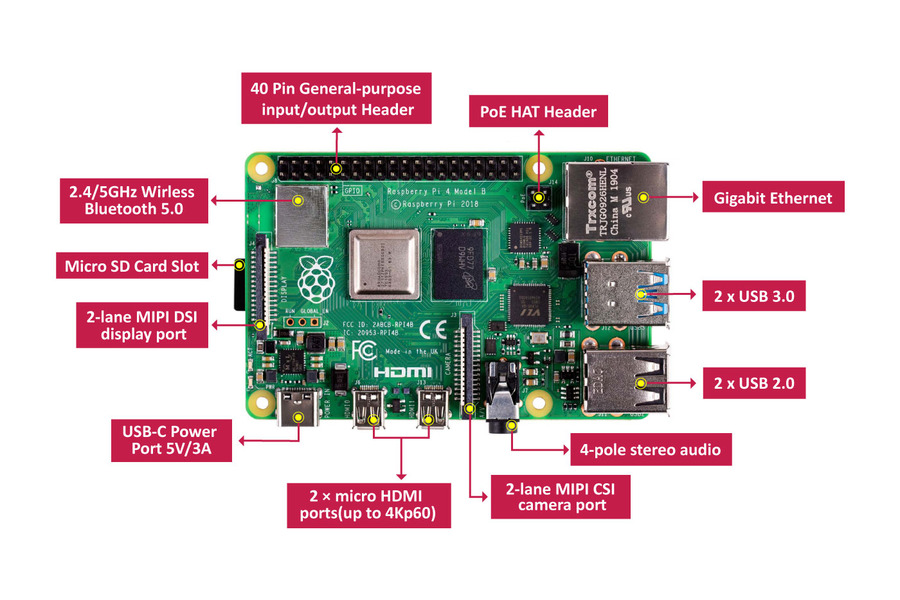

[raspi](https://mlsysbook.ai/contents/labs/raspi/setup/setup.html) | [headphone](https://www.amazon.eg/-/en/Plantronics-poly-BM-3220-stereo/dp/B089QVZBWM/ref=asc_df_B089QVZBWM/?tag=egoshpadde-21&linkCode=df0&hvadid=545122128141&hvpos=&hvnetw=g&hvrand=4664532699616662679&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1028886&hvtargid=pla-940620373343&psc=1&mcid=c83aa5a994de3d349d42a21c05370ae7) | [raspi hw](https://medium.com/4notfour/setting-up-alexa-on-rpi-8d15e6713cff) | [raspi4](https://www.audiosciencereview.com/forum/index.php?threads/how-good-is-bad-raspberry-pi-4b-headphone-output-dac-review.53090/) | []() | []() | []()

### **Step-4 |  Prepare GUI**


[Infotainment-System-Yocto | Benhcmarking](https://github.com/alzahraaelsallakh/Infotainment-System-Yocto)

#### Developing and Deploying Modern Applications for Automotive and Speech Recognition Using Yocto and Alternatives

In this article, we delve into various aspects of developing and deploying applications for embedded systems, with a focus on modern technologies. From using Yocto for Qt applications to exploring speech recognition solutions, we cover all essential topics discussed so far. Additionally, we explore alternatives to Qt for automotive software and discuss container-based approaches for deployment.

---

#### Introduction to Yocto and Qt Applications

Yocto is a powerful build system that enables developers to create custom Linux distributions tailored to their embedded systems. Qt, a popular framework for developing cross-platform applications, is often used in automotive and IoT solutions due to its flexibility and support for graphical user interfaces.

##### Adding Qt to Yocto Build
To include Qt in a Yocto build for applications running on a Raspberry Pi 4, ensure the following:

1. **Layer Configuration**:
   Add the necessary Qt layers (e.g., `meta-qt5`) to your `bblayers.conf`.
   ```bash
   git clone git://code.qt.io/yocto/meta-qt5.git
   ```
   ```plaintext
   BBLAYERS += "/path/to/meta-qt5"
   ```

2. **Installing Dependencies**:
   Modify `conf/local.conf` to include Qt libraries:
   ```plaintext
   IMAGE_INSTALL += "qtbase qttools qtdeclarative"
   ```

3. **Building the Image**:
   Run the Yocto build process:
   ```bash
   bitbake core-image-minimal
   ```

---

#### Speech Recognition in Embedded Systems

Speech recognition is increasingly relevant in automotive systems, enabling voice-controlled interfaces for enhanced user experience. One popular library is PocketSphinx, which is lightweight and suitable for embedded environments.

##### Adding PocketSphinx to Yocto
To include PocketSphinx and its tools in a Yocto build:

1. **Add Necessary Layers**:
   Check if `pocketsphinx` is available in your layers. If not, clone and include the `meta-openembedded` layer:
   ```bash
   git clone git://git.openembedded.org/meta-openembedded
   ```

2. **Install Packages**:
   Add the following to `conf/local.conf`:
   ```plaintext
   IMAGE_INSTALL += "pocketsphinx pocketsphinx-tools"
   ```

3. **Build the Image**:
   Use the standard Yocto build command to compile the image with PocketSphinx included.

##### Speech Recognition in a Container
For more flexibility, you can deploy speech recognition applications in a containerized environment.

###### Benefits of Using Containers:
- Portability across devices with Docker installed.
- Simplified dependency management.
- Easier updates and debugging.

###### Dockerfile Example for PocketSphinx:
```dockerfile
FROM debian:bullseye

RUN apt-get update && apt-get install -y \
    qt5-default \
    pocketsphinx \
    pocketsphinx-tools \
    build-essential \
    cmake

WORKDIR /app
COPY . /app

CMD ["pocketsphinx_continuous", "-inmic", "yes"]
```

Build and run the container:
```bash
docker build -t speech-recognition-app .
docker run --rm -it --device /dev/snd speech-recognition-app
```

---

#### Modern Alternatives to Qt for Automotive Software

Qt remains a dominant framework in automotive applications. However, several modern alternatives are emerging:

| **Framework**       | **Language** | **Graphics Support** | **Hardware Acceleration** | **Best Usage**                     |
|----------------------|--------------|-----------------------|----------------------------|-------------------------------------|
| **Qt5**             | C++          | OpenGL/3D            | Yes                        | Automotive HMI, cross-platform GUI |
| **Flutter**         | Dart         | Skia                 | Yes                        | Rich UIs, mobile-first designs     |
| **React Native**    | JavaScript   | React                | No                         | Mobile apps with native feel       |
| **Android Automotive** | Java/Kotlin | OpenGL               | Yes                        | Infotainment systems               |
| **Crank Storyboard**| C            | Custom               | Yes                        | Low-resource embedded devices      |
| **Altia Design**    | Custom       | Custom               | Yes                        | Production-grade automotive UIs    |

##### Key Considerations:
- **Qt5** is ideal for embedded systems requiring a robust GUI and HMI development.
- **Flutter** is gaining traction for modern UIs but lacks deep automotive ecosystem support.

---

#### Deployment and Development Workflow

##### Yocto vs Container for Deployment

| **Criteria**             | **Yocto Deployment**                                          | **Container Deployment**                                         |
|---------------------------|--------------------------------------------------------------|------------------------------------------------------------------|
| **Portability**           | Limited to Yocto-built images.                               | Portable across Docker-supported systems.                       |
| **Complexity**            | Requires Yocto setup and custom layers.                      | Easier to manage and debug.                                     |
| **Real-Time Audio**       | Integrated with Yocto's build system.                        | Requires additional configuration for audio device access.      |
| **Ease of Updates**       | Requires full image rebuild.                                 | Quick container updates.                                        |
| **Best Use Case**         | Single-platform embedded solution.                           | Cross-platform applications and rapid prototyping.              |

##### Deployment Tips
- For real-time applications, ensure hardware acceleration is enabled.
- Use cross-compilation to reduce build times for ARM devices.

---

##### Conclusion

Developing applications for embedded systems, whether for automotive or speech recognition, involves careful selection of tools and frameworks. Yocto remains a robust choice for creating tailored distributions, while containerized approaches offer flexibility and portability. Qt continues to be a strong contender for automotive HMIs, though alternatives like Flutter and Crank Storyboard provide modernized workflows.

By understanding the strengths and weaknesses of each approach, you can choose the best solution for your specific needs, whether you're building an automotive HMI or a voice assistant on Raspberry Pi.



```plaintext
meta-userapp/
.
├── classes
│   └── useradd.bbclass
├── conf
│   └── layer.conf
├── COPYING.MIT
├── README
├── recipes-apps
│   └── audio-transcription
│       ├── audio-transcription_1.0.bb
│       └── files
│           ├── main.py
│           ├── qt_app.desktop
│           ├── qt_app.svg
│           └── requirements-backend.txt
├── recipes-connectivity
│   ├── dhcpcd
│   │   ├── files
│   │   │   ├── dhcpcd.service
│   │   │   └── wpa_supplicant.conf
│   │   └── network-config.bb
│   └── wpa-supplicant
│       ├── files
│       │   ├── wpa_supplicant.conf
│       │   └── wpa_supplicant-wlan0.service
│       └── wpa-supplicant_%.bbappend
├── recipes-core
│   └── custom
│       ├── files
│       │   ├── file1
│       │   ├── file2
│       │   └── file3
│       └── usergroup.bb
├── recipes-docker
│   └── audio-backend
│       ├── audio-backend_1.0.bb
│       └── files
│           └── Dockerfile
├── recipes-kernel
│   └── linux
│       ├── linux-raspberrypi
│       │   └── wifi-sysfs.cfg
│       └── linux-raspberrypi_%.bbappend
└── recipes-qt
    └── qt5
        └── qt5-env_1.0.bbappend

22 directories, 24 files



```

##### **Generate and Install SDK**


[Guide for installation](https://www.youtube.com/watch?v=ecWCqJ2sTFA)  | [QT-Creator](https://www.youtube.com/watch?v=H2ud-ATLIdI) | [QT-Creator](https://www.youtube.com/watch?v=cXojtB8vS2E) | [qt PLaylist](https://www.youtube.com/watch?v=cXojtB8vS2E) | [QT-Creator](https://www.youtube.com/watch?v=ecWCqJ2sTFA&list=PLzJTJ1FSIHJtn5gj6oLWnrDpd6dXPSbbG&index=19&pp=iAQB) | []() | []() | []() | []() | []() | []()
```bash

bitbake core-image-base  -c  populate_sdk

cd tmp/deploy/sdk

# run this script  ./poky-glibc-x86_64-<image-name>-<arch>-toolchain.sh
./poky-glibc-x86_64-core-image-base-<arch>-toolchain.sh
./poky-glibc-x86_64-core-image-base-cortexa72-raspberrypi4-64-toolchain-4.0.24.sh
## Set install dir

```

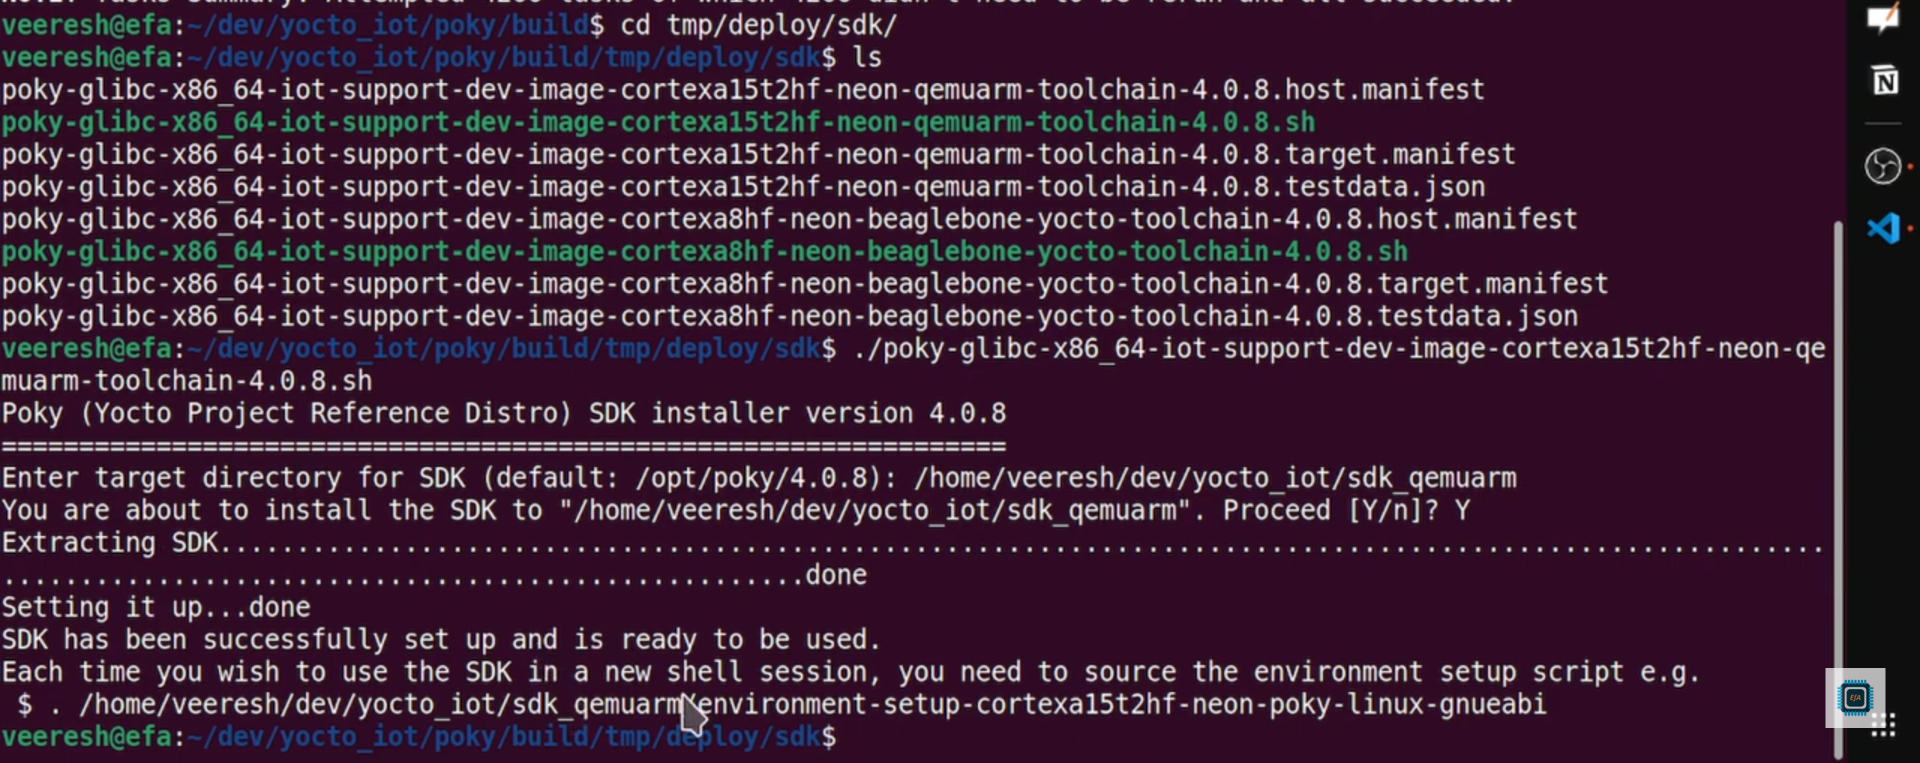


> notice every single to run sdk you should run the script source env

```bash
cd install_dir

source envitonment-setup-<>-<>
source /opt/poky/1.*/environment-setup-<arch>-poky-linux
# for example {source /home/Yocto_SDK/environment-setup-armv8a-poky-linux}
echo $CC
# This should point to the cross-compiler (e.g., arm-poky-linux-gnueabi-gcc).
echo $PATH

aarch64-poky-linux-gcc --version


sudo apt install qtcreator


```



## **QT Creator**



> Configure Qt Creator to use the cross-compilation toolchain:
>
> - Open Qt Creator and go to Tools > Options > Kits.
> - Add a new kit using the cross-compiler and Qt version provided by the SDK.



**Create a Qt Application**

> In Qt Creator, create a new project:
>  - Select File > New File or Project > Application > Qt Widgets Application or Qt Quick Application.
>  - Set up your project name and location.

> Set the Kit you configured earlier for cross-compilation.

> Write your application code.

**Build and Deploy the Application**

> Build the application in Qt Creator using the cross-compilation kit.

> Copy the compiled application to the target device:
```bash
scp <application-binary> root@<target-ip>:/path/to/deploy
```

> Run the application on the target device:
```bash
./<application-binary>
```


---


**Create Sample Hello World application**

```c
#include 
int main(void)
{
printf("Hello, World!\n");
return 0;
}
```

**Makefile based applications using the SDK**

```makefile
all: helloworld

helloworld: helloworld.c
${CC} -o helloworld helloworld.c

clean:
rm helloworld
```

```bash
make
printenv CC
file helloworld
```

**CMake based applications using the SDK**

```cmake
project(helloworld)
add_executable(helloworld helloworld.c)
set(CMAKE_TOOLCHAIN_FILE $ENV{OE_CMAKE_TOOLCHAIN_FILE})
```

> You will notice that we are setting the toolchain file for cmake to be the environment variable OE_CMAKE_TOOLCHAIN_FILE, 
> which is set by the yocto SDK environment setup script. 


```bash
printenv | grep OE_CMAKE_TOOLCHAIN_FILE
cmake .
make
file helloworld
```

#### Clarifying the Relationship:

##### meta-qt5:
- **Purpose**: This is the Yocto layer that provides recipes to build Qt5 libraries and tools.
- **Role in Yocto System**:
  - When you build the Yocto image, `meta-qt5` ensures that the Qt5 libraries are available within the Yocto system (on your embedded device).
  - When you build the SDK, `meta-qt5` ensures that the necessary Qt5 libraries are included in the SDK for cross-compiling Qt applications.
  
  In short, `meta-qt5` is responsible for integrating Qt5 into both your embedded Linux image and the SDK used for developing applications.

##### SDK:
- **Purpose**: The SDK is a development environment that allows you to write code on your host machine (e.g., PC or laptop) but compile and deploy it to your embedded target device.
- **Components of the SDK**:
  - **Cross-compiler toolchain**: Enables you to compile code on your host machine and create binaries that are executable on your embedded device.
  - **Qt5 libraries**: If you configured Yocto to include Qt5 (via `meta-qt5`), the SDK will also contain the Qt5 libraries required for developing applications that will run on your target device.
  
  The SDK allows you to develop and test code locally on your host while ensuring that the code is compatible with your embedded target.

##### Qt Creator:
- **Purpose**: Qt Creator is an Integrated Development Environment (IDE) used to write, debug, and build Qt applications.
- **Role in Development Workflow**:
  - **Configuration**: You configure Qt Creator to use the cross-compilation toolchain from the SDK. This ensures that when you build your Qt5 applications, they are compiled for your target device’s architecture (e.g., ARM) using the cross-compiler.
  - **Application Development**: You write your application in Qt Creator, which provides code editing, debugging, and testing features.
  - **Deploying to the Target**: Once the application is compiled in Qt Creator using the SDK’s cross-compiler, you can deploy the application to the target device. This can be done manually via commands like `scp` or from within Qt Creator if remote deployment is configured.

##### Summary of Relationships:
1. **meta-qt5** provides the Qt5 libraries and tools in the Yocto system (embedded Linux) and in the SDK.
2. **The SDK** contains everything needed to cross-compile applications, including the Qt5 libraries, which are required for development on the host machine.
3. **Qt Creator** is the IDE used to develop applications, configured to use the SDK’s cross-compilation toolchain. It compiles Qt5 applications for the embedded target device and deploys them.

This workflow ensures that you can develop, test, and deploy Qt5 applications to your embedded device with the full support of Yocto, the SDK, and Qt Creator.


```bash
bitbake-layers add-layer ../meta-qt6/



cd /media/sda1/00_Embedded/build/downloads/git2
git clone --bare https://code.qt.io/qt/qtpositioning.git code.qt.io.qt.qtpositioning.git
git clone --bare https://code.qt.io/qt/qtwebengine.git code.qt.io.qt.qtwebengine.git


```

```bash
# if you need use opencv with gstreamr

ferganey@ferganey-Inspiron-5570:/media/ferganey/00_Embedded/Building$ sudo nano /etc/sysctl.conf
[sudo] password for ferganey: 

    fs.inotify.max_user_watches=524288

ferganey@ferganey-Inspiron-5570:/media/ferganey/00_Embedded/Building$ sudo sysctl -p
fs.inotify.max_user_watches = 524288
ferganey@ferganey-Inspiron-5570:/media/ferganey/00_Embedded/Building$ sysctl -n fs.inotify.max_user_watches
524288

# manually clone
git clone --branch master --single-branch git@github.com:opencv/opencv.git /media/ferganey/00_Embedded/00_YoctoBuild/downloads/opencv_repo
git clone --branch ippicv/master_20191018 --single-branch git@github.com:opencv/opencv_3rdparty.git /media/ferganey/00_Embedded/00_YoctoBuild/downloads/opencv_3rdparty_ipp
git clone --branch wechat_qrcode --single-branch git@github.com:WeChatCV/opencv_3rdparty.git /media/ferganey/00_Embedded/00_YoctoBuild/downloads/opencv_3rdparty_wechat_qrcode

# add this part in opencv.bb
{
SRC_URI = " \
    file:///media/ferganey/00_Embedded/00_YoctoBuild/downloads/opencv_repo \
    file:///media/ferganey/00_Embedded/00_YoctoBuild/downloads/opencv_3rdparty_ipp \
    file:///media/ferganey/00_Embedded/00_YoctoBuild/downloads/opencv_3rdparty_wechat_qrcode \
"
}

# this originl 
{
SRC_URI = "git://github.com/opencv/opencv.git;name=opencv;branch=master;protocol=https \
           git://github.com/opencv/opencv_contrib.git;destsuffix=git/contrib;name=contrib;branch=master;protocol=https \
           git://github.com/opencv/opencv_3rdparty.git;branch=ippicv/master_20191018;destsuffix=git/ipp;name=ipp;protocol=https \
           git://github.com/opencv/opencv_3rdparty.git;branch=contrib_xfeatures2d_boostdesc_20161012;destsuffix=git/boostdesc;name=boostdesc;protocol=https \
           git://github.com/opencv/opencv_3rdparty.git;branch=contrib_xfeatures2d_vgg_20160317;destsuffix=git/vgg;name=vgg;protocol=https \
           git://github.com/opencv/opencv_3rdparty.git;branch=contrib_face_alignment_20170818;destsuffix=git/face;name=face;protocol=https \
           git://github.com/WeChatCV/opencv_3rdparty.git;branch=wechat_qrcode;destsuffix=git/wechat_qrcode;name=wechat-qrcode;protocol=https \
           file://0001-3rdparty-ippicv-Use-pre-downloaded-ipp.patch \
           file://0003-To-fix-errors-as-following.patch \
           file://0001-Temporarliy-work-around-deprecated-ffmpeg-RAW-functi.patch \
           file://0001-Dont-use-isystem.patch \
           file://download.patch \
           file://0001-Make-ts-module-external.patch \
           file://0001-core-vsx-update-vec_absd-workaround-condition.patch \
           file://CVE-2023-2617.patch;patchdir=contrib \
           file://CVE-2023-2618.patch;patchdir=contrib \
           "    
}

```

```bash
# export this on shell
export GIT_USER=ahmedferganey
export GIT_TOKEN=<>

# or add this on bbapend
SRCOPTIONS = ";user=ahmedferganey;password=<>"

# and this on local.conf
MIRRORS += " \
    git://github.com/raspberrypi/ https://github.com/raspberrypi/;protocol=https \n \
    http://github.com/raspberrypi/ http://github.com/raspberrypi/;protocol=https \n \
"

git://github.com/raspberrypi/linux.git;name=machine;branch=rpi-5.15.y;protocol=https;user=ahmedferganey;password=<your-github-token> \

# or add this mirror in local.conf 
MIRRORS += " \
    git://github.com/raspberrypi/ https://github.com/raspberrypi/;protocol=https \n \
"
MIRRORS += " \
    git://github.com/opencv/ https://github.com/opencv/;protocol=https \n \
    git://github.com/opencv/opencv_3rdparty.git https://github.com/opencv/opencv_3rdparty.git;protocol=https \n \
    git://github.com/WeChatCV/ https://github.com/WeChatCV/;protocol=https \n \
"

# Some users have reported issues with HTTP/2 when fetching large repositories. Disable HTTP/2 by setting the following Git configuration:

git config --global http.version HTTP/1.1


ferganey@ferganey-Inspiron-5570:/media/ferganey/00_Embedded/Building$ git ls-remote https://github.com/raspberrypi/linux.git | grep "refs/heads/rpi-6.6.y"
8a08b4ad6dbd48a826b3052e52a4fdc88c3ac36e	refs/heads/rpi-6.6.y


ferganey@ferganey-Inspiron-5570:/media/ferganey/00_Embedded/Building$ git ls-remote --tags https://github.com/raspberrypi/linux.git

wget https://github.com/raspberrypi/linux/archive/rpi-6.6.y.tar.gz

touch linux-raspberripi.6.6.bb 
{
LINUX_VERSION ?= "6.6.2"
LINUX_RPI_BRANCH ?= "rpi-6.6.y"
LINUX_RPI_KMETA_BRANCH ?= "yocto-6.6"

SRCREV_machine = "8a08b4ad6dbd48a826b3052e52a4fdc88c3ac36e"
SRCREV_meta = "078f986aa4c328285abd0181cc21724d832a3ae0"

KMETA = "kernel-meta"

# Modify SRC_URI to use the downloaded tarball instead of git
SRC_URI = " \
    file:///media/ferganey/00_Embedded/Building/downloads/rpi-6.6.y.tar.gz \
    git://git.yoctoproject.org/yocto-kernel-cache;type=kmeta;name=meta;branch=${LINUX_RPI_KMETA_BRANCH};destsuffix=${KMETA} \
    "

require linux-raspberrypi.inc

KERNEL_DTC_FLAGS += "-@ -H epapr"
    
}

# next

bitbake -c configure linux-raspberrypi

bitbake -k core-image-base -c populate_sdk

bitbake core-image-base -c populate_sdk


bitbake -c clean python3-numpy
bitbake -c clean opencv
bitbake -c cleansstate opencv


cd /media/ferganey/00_Embedded/Building/tmp/work/cortexa72-poky-linux/python3-numpy/1.22.3-r0/recipe-sysroot/usr/include
/media/ferganey/00_Embedded/Building/tmp/work/cortexa72-poky-linux/python3-numpy/1.22.3-r0/numpy-1.22.3/numpy/core/include/numpy

bitbake -c cleansstate python3-tensorflow-lite
bitbake -c cleansstate libtensorflow-lite
bitbake -c cleansstate onnxruntime
bitbake -c cleansstate opencv




```




PATCHRESOLVE = "noop"
BB_DISKMON_DIRS ??= "\
    STOPTASKS,${TMPDIR},1G,100K \
    STOPTASKS,${DL_DIR},1G,100K \
    STOPTASKS,${SSTATE_DIR},1G,100K \
    STOPTASKS,/tmp,100M,100K \
    HALT,${TMPDIR},100M,1K \
    HALT,${DL_DIR},100M,1K \
    HALT,${SSTATE_DIR},100M,1K \
    HALT,/tmp,10M,1K"
CONF_VERSION = "2"
ACCEPT_FSL_EULA = "1"
USER_CLASSES ?= "buildstats"
OE_TERMINAL = "screen"
IMAGE_ROOTFS_EXTRA_SPACE = "5242880"
PACKAGE_CLASSES ?= "package_rpm"
PACKAGECONFIG:append:pn-qemu-system-native = " sdl"
IMAGE_FSTYPES = "tar.bz2 ext4 wic.bz2 wic.bmap"
BB_NUMBER_THREADS = "8"
PARALLEL_MAKE = "-j 8"
FETCH_CMD = "git -c http.postBuffer=2147483648"
GIT_CONFIG_OPTIONS = "-c core.fsync=true"

######################################################################################################

MACHINE ??= "raspberrypi4-64"
DISTRO ?= "poky"
DISTRO_FEATURES:append = " virtualization systemd seccomp wifi bluez5 pi-bluetooth clock-source bluetooth linux-firmware-bcm43430 linux-firmware-brcmfmac43430 qt6 vc4graphics alsa opengl gstreamer x11 wayland multimedia gplv3 pam vulkan"
DISTRO_FEATURES_BACKFILL_CONSIDERED += "sysvinit"


######################################################################################################

TCLIBC = "glibc"
SYSTEMD_PARALLEL_STARTUP = "1"
SYSTEMD_SERVICES_REMOVE = "printer.target networkmanager"
SYSTEMD_DEFAULT_TARGET = "multi-user.target"
SYSTEMD_CPUSET = "0-3"

######################################################################################################

PREFERRED_VERSION_linux-raspberrypi = "6.1.%"
PREFERRED_BRANCH_linux-raspberrypi = "rpi-6.1.y"
EXTRA_FIRMWARE += "brcm/brcmfmac43430-sdio.bin brcm/brcmfmac43455-sdio.bin"
MODULE_AUTOLOAD += " \
    brcmfmac mt7601u ath9k libertas libertas_sdio p54usb rtl8187 mwifiex_sdio \
    rtl8192cu rt2800usb zd1211rw rtl8192cu ath9k_htc ath6kl rndis_wlan \
    brcmutil rtl8xxxu carl9170 hostap \
"
KERNEL_MODULE_AUTOLOAD += " i2c-dev cfg80211 mac80211 brcmfmac mt7601u ath9k vc4 drm drm_kms_helper"
MODULES += "brcmfmac"
RPI_KERNEL_DEVICETREE = " \
    broadcom/bcm2711-rpi-4-b.dtb \
    broadcom/bcm2711-rpi-400.dtb \
    broadcom/bcm2711-rpi-cm4.dtb \
"
ENABLE_UART = "1"
ENABLE_I2C = "1"
ENABLE_SPI_BUS = "1"
ENABLE_WIFI = "1"
DISABLE_SPLASH = "1"
RPI_USE_U_BOOT = "1"
WIFI_COUNTRY = "EG"
KERNEL_IMAGETYPE_UBOOT ?= "Image"
SDIMG_KERNELIMAGE ?= "kernel8.img"
KERNEL_IMAGETYPE_DIRECT ?= "Image"
KERNEL_BOOTCMD ?= "booti"
KERNEL_DEVICETREE += " broadcom/bcm2711-rpi-4-b.dtb "
RPI_EXTRA_CONFIG = "dtoverlay=disable-bt\ndtoverlay=pi4-wifi\ngpu_mem=256"
MACHINE_ESSENTIAL_EXTRA_RRECOMMENDS += "kernel-module-brcmfmac kernel-module-brcmfmac-wcc"
MACHINE_FEATURES += "pci usbhost ssh v4l2 evdev bluetooth network opengl i2c gpio spi autofs wifi vc4graphics secureboot tpm rtc"
MACHINE_EXTRA_RRECOMMENDS += " \
    linux-firmware-rpidistro-bcm43455 \
    bluez-firmware-rpidistro-bcm4345c0-hcd \
    linux-firmware-rpidistro-bcm43456 \
    bluez-firmware-rpidistro-bcm4345c5-hcd \
    kernel-module-bcm2835-v4l2 \
    linux-firmware-rpidistro-raspberrypi4 \
    kernel-module-r8152 kernel-module-ax88179 \
"
VC4DTBO ?= "vc4-kms-v3d"
APPEND += "dtoverlay=brcmfmac"
DISABLE_RPI_BOOT_LOGO = "1"
INIT_MANAGER = "systemd"
VIRTUAL-RUNTIME_init_manager = "systemd"
VIRTUAL-RUNTIME_initscripts = "systemd-compat-units"

######################################################################################################
EXTRA_IMAGE_FEATURES += "tools-sdk dev-pkgs package-management debug-tweaks "
IMAGE_FEATURES += "tools-sdk ssh-server-openssh ssh-server-dropbear"
IMAGE_CLASSES += " qt6-qmake populate_sdk_qt6 qt6-cmake"

IMAGE_INSTALL += " \
    docker-ce systemd systemd-compat-units \
    python3 python3-pip python3-setuptools python3-wheel python3-pyaudio \
    python3-smbus python3-aiohttp python3-requests python3-requests-toolbelt \
    python3-click python3-pyjwt python3-numpy \
    packagegroup-core-ssh-openssh \
    packagegroup-core-full-cmdline \
    packagegroup-core-buildessential \
    hostapd bridge-utils dhcpcd iw i2c-tools bluez5 pi-bluetooth bluez5-testtools \
    alsa-utils wireless-regdb iproute2 networkd-dispatcher \
    linux-firmware-rpidistro-bcm43430 \
    util-linux net-tools lockdev ntp kmod sudo \
    htop nano bash shadow coreutils base-passwd which \
    wpa-supplicant apt run-postinsts \
    packagegroup-core-container network-config usergroup iptables \
    kernel-modules linux-firmware wayland udev-rules-rpi glibc \
    x11vnc rsync udev-rules-rpi make cmake \
    qtbase qtdeclarative qtsvg qttools qtmultimedia qtwayland qt3d qtquick3d qtquick3dphysics \
    qtserialport qtserialbus qtnetworkauth qtmqtt qtcoap qtopcua qtpositioning qtsensors qtvirtualkeyboard \
    qtimageformats qttranslations qtlocation qtcharts qtconnectivity qtdatavis3d qtwebsockets qtwebengine \
    liberation-fonts gstreamer1.0 gstreamer1.0-plugins-good gstreamer1.0-plugins-base gstreamer1.0-plugins-bad \
    gstreamer1.0-rtsp-server gstreamer1.0-vaapi mesa mesa-demos xrandr xf86-video-fbdev vulkan-loader vulkan-tools \
    gcc libgcc libstdc++ \
    ffmpeg libva gstreamer1.0-libav libvdpau glib-2.0 libva-utils \
    qtmultimedia-plugins gstreamer1.0-plugins-ugly gstreamer1.0-plugins-base-alsa \
    alsa-lib alsa-utils alsa-tools libasound libvorbis libxkbcommon \
    packagegroup-core-sdk \
    packagegroup-core-standalone-sdk-target \
    packagegroup-core-tools-debug \
    packagegroup-core-tools-profile \
    packagegroup-core-tools-testapps \
    packagegroup-core-x11 \
    packagegroup-core-x11-base \
    packagegroup-core-x11-xserver \
    packagegroup-core-weston \
"

CORE_IMAGE_EXTRA_INSTALL += " \
    packagegroup-core-nfs \
    packagegroup-core-ssh-dropbear \
"


######################################################################################################


QT_ALLOW_MISSING_TOOLS_PACKAGES = "ON"
LICENSE_FLAGS_ACCEPTED += "commercial commercial_qt6 commercial_ffmpeg commercial_gstreamer1.0-libav"
TOOLCHAIN_HOST_TASK += " \
    nativesdk-packagegroup-qt6-toolchain-host \
    nativesdk-packagegroup-qt6-toolchain-host-essentials \
    nativesdk-packagegroup-sdk-host \
    nativesdk-packagegroup-qt6-toolchain-host-addons \
"
TOOLCHAIN_TARGET_TASK += " \
    packagegroup-qt6-essentials \
    packagegroup-qt6-addons \
    packagegroup-qt6-modules \
    qtmultimedia-dev \
    glibc libstdc++ libgcc qtbase \
"
PACKAGECONFIG:append:pn-qtbase = " \
    alsa x11  multimedia accessibility dbus fontconfig glib gui harfbuzz icu jpeg libinput openssl png udev widgets xkbcommon zlib zstd vulkan gl xcb eglfs kms gbm linuxfb \
"
PACKAGECONFIG_pn-qtbase-native ??= " gui widgets jpeg png dbus openssl zlib zstd"
PACKAGECONFIG:append:pn-qtmultimedia = " ffmpeg alsa "
PACKAGECONFIG:append:gstreamer = " ffmpeg"
PACKAGECONFIG:append:ffmpeg = " alsa libopus x264 "
FFMPEG_EXTRA_OECONF = "--enable-shared --disable-static --enable-gpl --enable-nonfree --enable-x264 --enable-libopus"
#PACKAGECONFIG:append:pn-gstreamer1.0-plugins-bad = " opencv"
PACKAGECONFIG_pn-gstreamer1.0-plugins-bad ??= " \
    orc bluez vulkan x11 wayland gl bz2 closedcaption curl dash dtls hls openssl sbc smoothstreaming sndfile ttml uvch264 webp rsvg faad  \
"



```bash

```